# OCR Cookbook

---

## OCR Exploration and Structured Outputs
In this cookbook, we will explore the basics of OCR and leverage it together with existing models to achieve structured outputs fueled by our OCR model.

You may want to do this in case current vision models are not powerful enough, hence enhancing their vision OCR capabilities with the OCR model to achieve better structured data extraction.

---

### Used
- Mistral OCR
- Pixtral 12B & Ministral 8B


### Setup
First, let's install `mistralai` and download the required files.

In [17]:
!pip install mistralai

In [2]:
!wget https://raw.githubusercontent.com/mistralai/cookbook/refs/heads/main/mistral/ocr/mistral7b.pdf
!wget https://raw.githubusercontent.com/mistralai/cookbook/refs/heads/main/mistral/ocr/receipt.png

--2025-03-07 03:33:47--  https://raw.githubusercontent.com/mistralai/cookbook/refs/heads/main/mistral/ocr/mistral7b.pdf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3749788 (3.6M) [application/octet-stream]
Saving to: ‘mistral7b.pdf’

mistral7b.pdf       100%[===================>]   3.58M  11.8MB/s    in 0.3s    

2025-03-07 03:33:47 (11.8 MB/s) - ‘mistral7b.pdf’ saved [3749788/3749788]

--2025-03-07 03:33:48--  https://raw.githubusercontent.com/mistralai/cookbook/refs/heads/main/mistral/ocr/receipt.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting res

We can now set up our client. You can create an API key on our [Plateforme](https://console.mistral.ai/api-keys/).

In [3]:
from mistralai import Mistral

api_key = "1MrPsj61cjLtUnjyg5YPBHQAB5i7WbQz"
client = Mistral(api_key=api_key)

There are two types of files you can apply OCR to:
- PDF files, either uploaded or from URLs...

In [9]:
from pathlib import Path

pdf_file = Path("1.pdf")
assert pdf_file.is_file()

{
    "pages": [
        {
            "index": 0,
            "markdown": "# ![img-0.jpeg](img-0.jpeg) \n\n## \u672c\u79d1\u6bd5\u4e1a\u8bba\u6587\uff08\u8bbe\u8ba1\uff09 <br> \u5de5\u4f5c\u624b\u518c\n\n![img-1.jpeg](img-1.jpeg)\n\n\u5409\u6797\u5927\u5b66\u6559\u52a1\u5904<br>\u4e8c\u25cb\u4e8c\u4e09\u5e74\u5341\u6708",
            "images": [
                {
                    "id": "img-0.jpeg",
                    "top_left_x": 92,
                    "top_left_y": 161,
                    "bottom_right_x": 752,
                    "bottom_right_y": 364,
                    "image_base64": ""
                },
                {
                    "id": "img-1.jpeg",
                    "top_left_x": 375,
                    "top_left_y": 1017,
                    "bottom_right_x": 1334,
                    "bottom_right_y": 1794,
                    "image_base64": ""
                }
            ],
            "dimensions": {
                "dpi": 200,
                "he
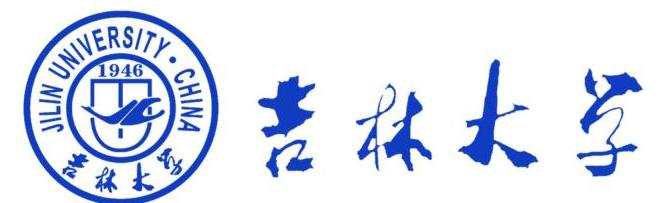
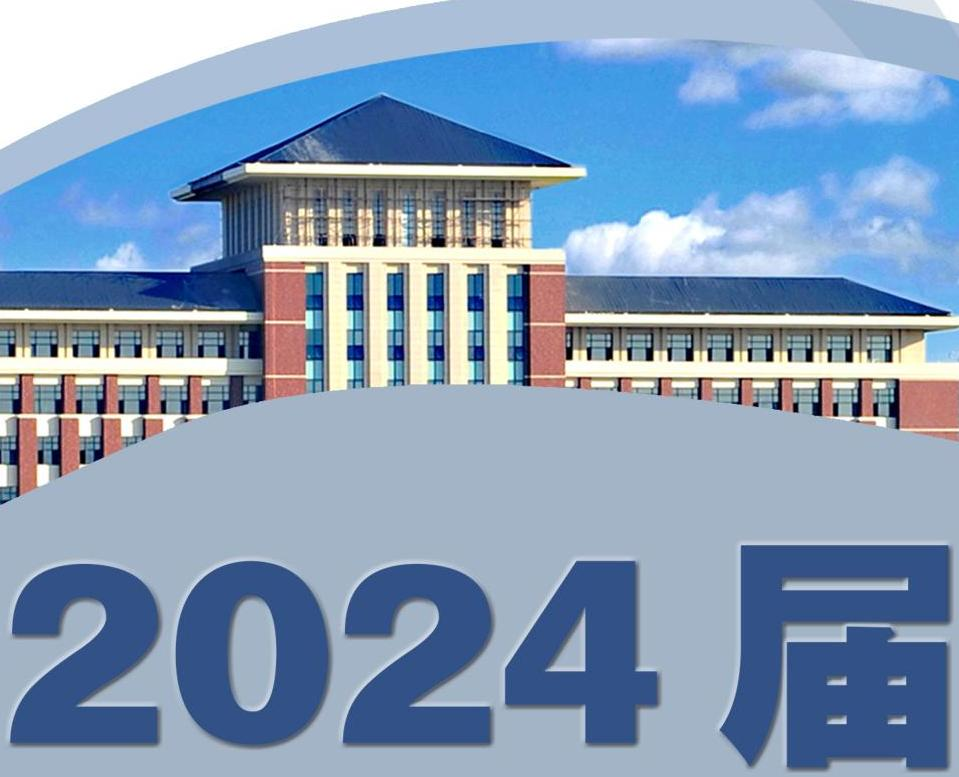
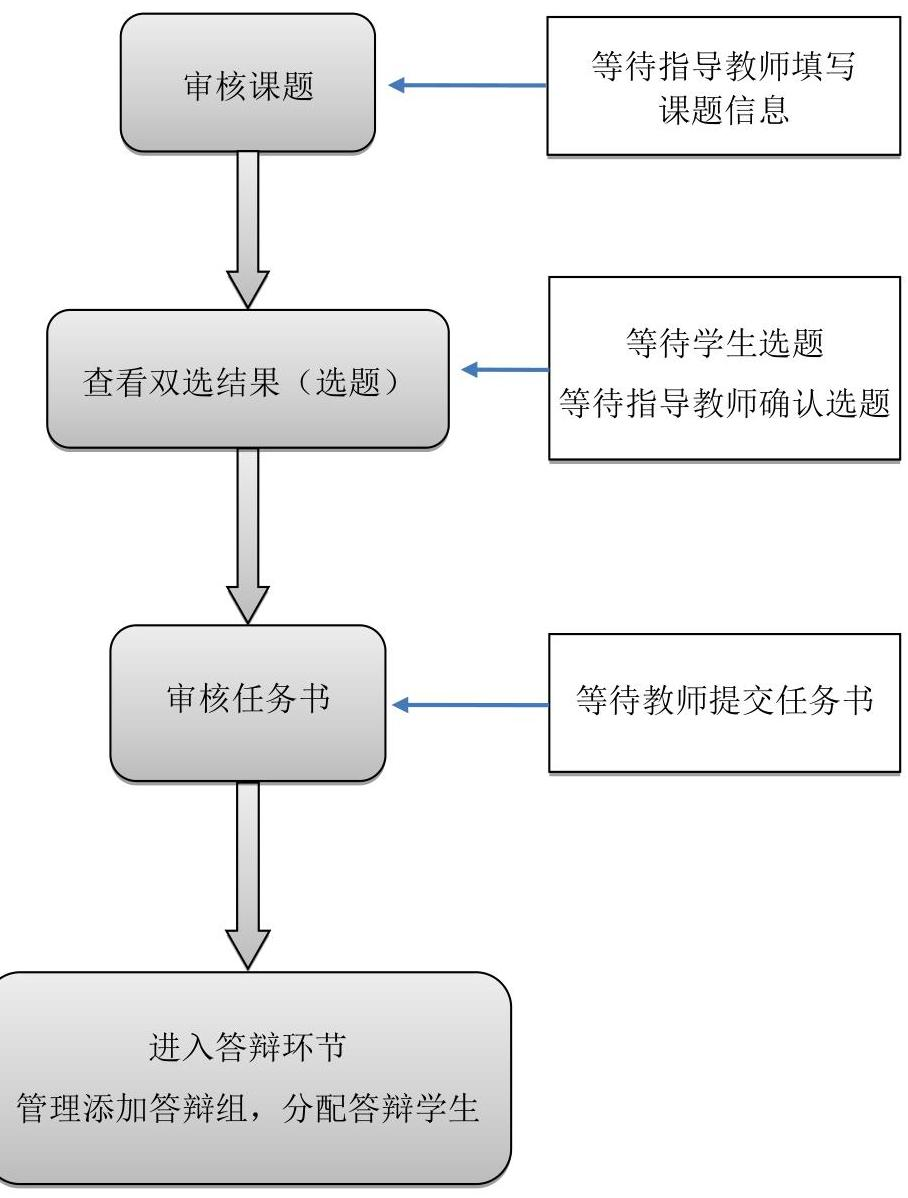
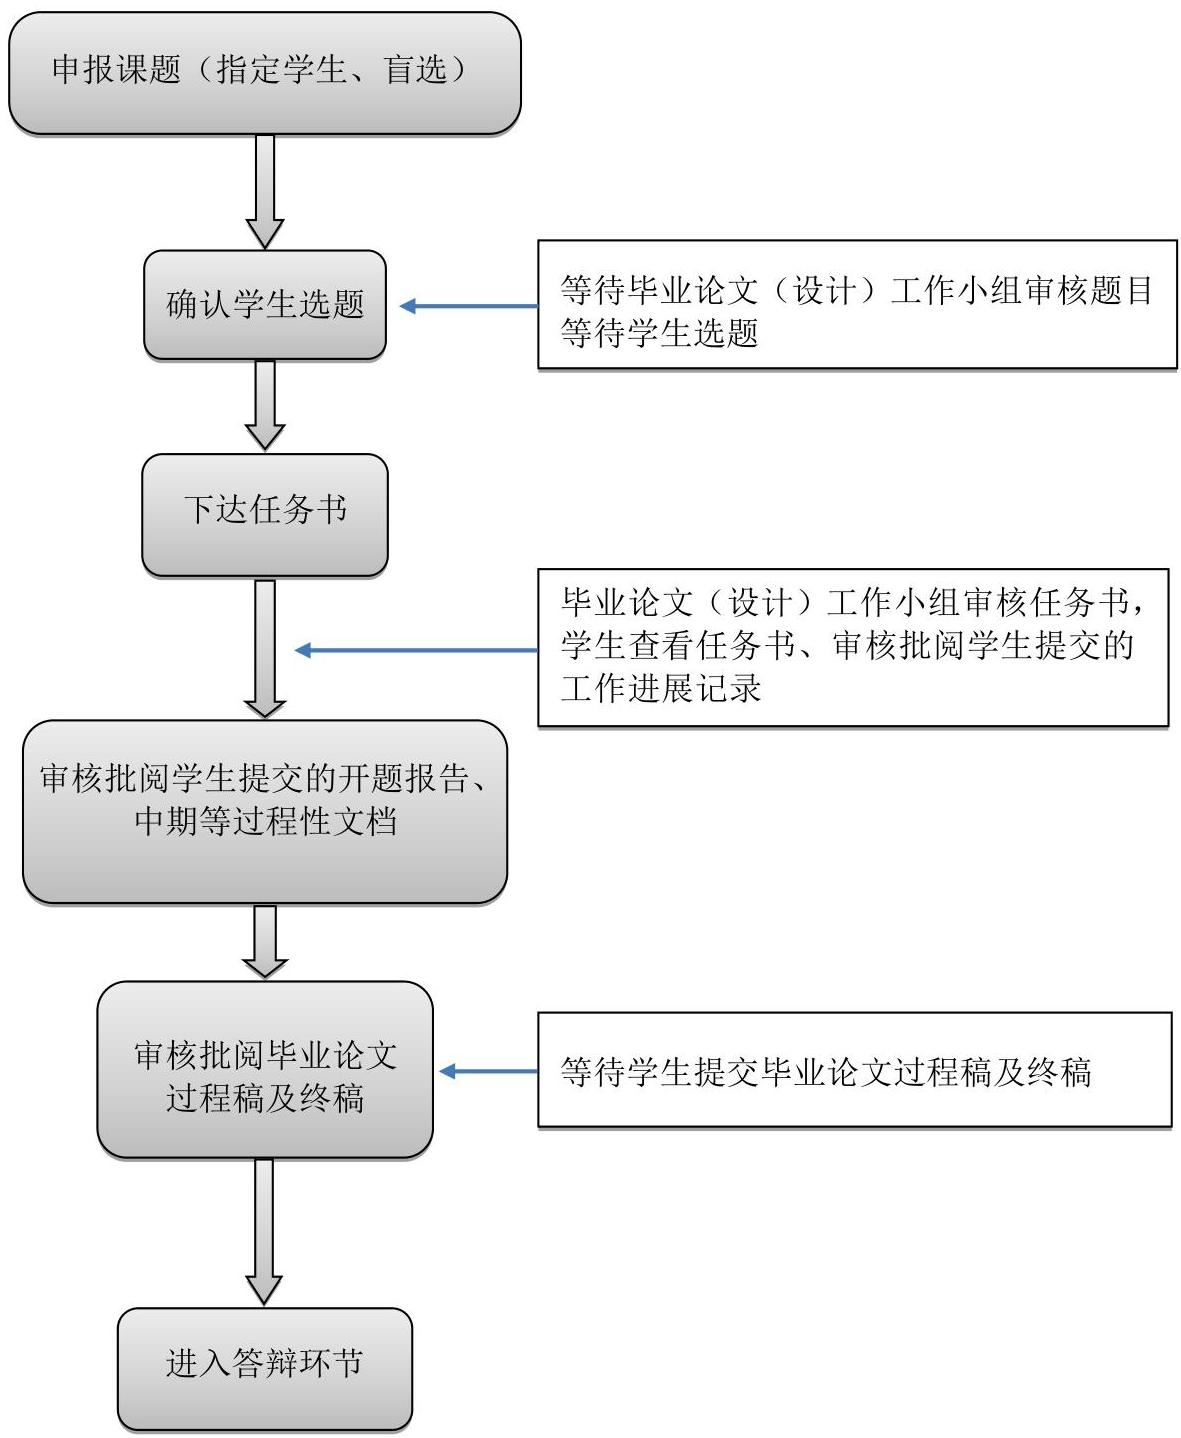
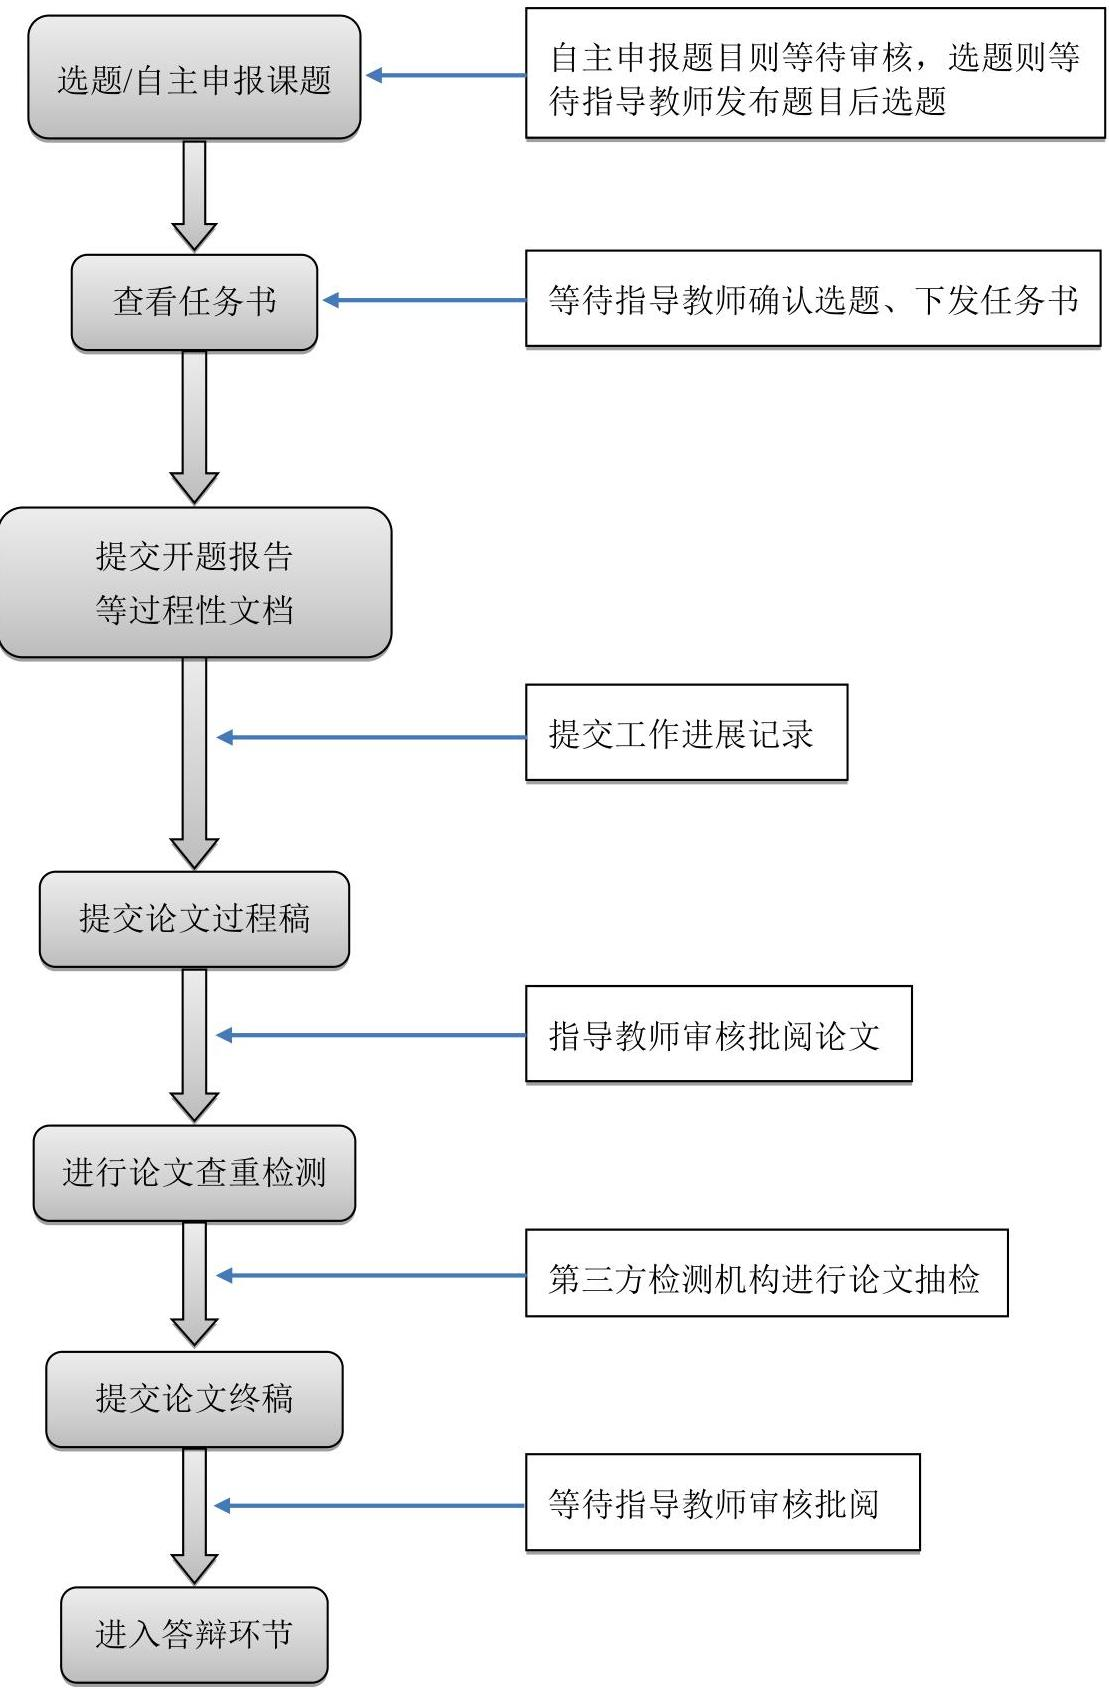
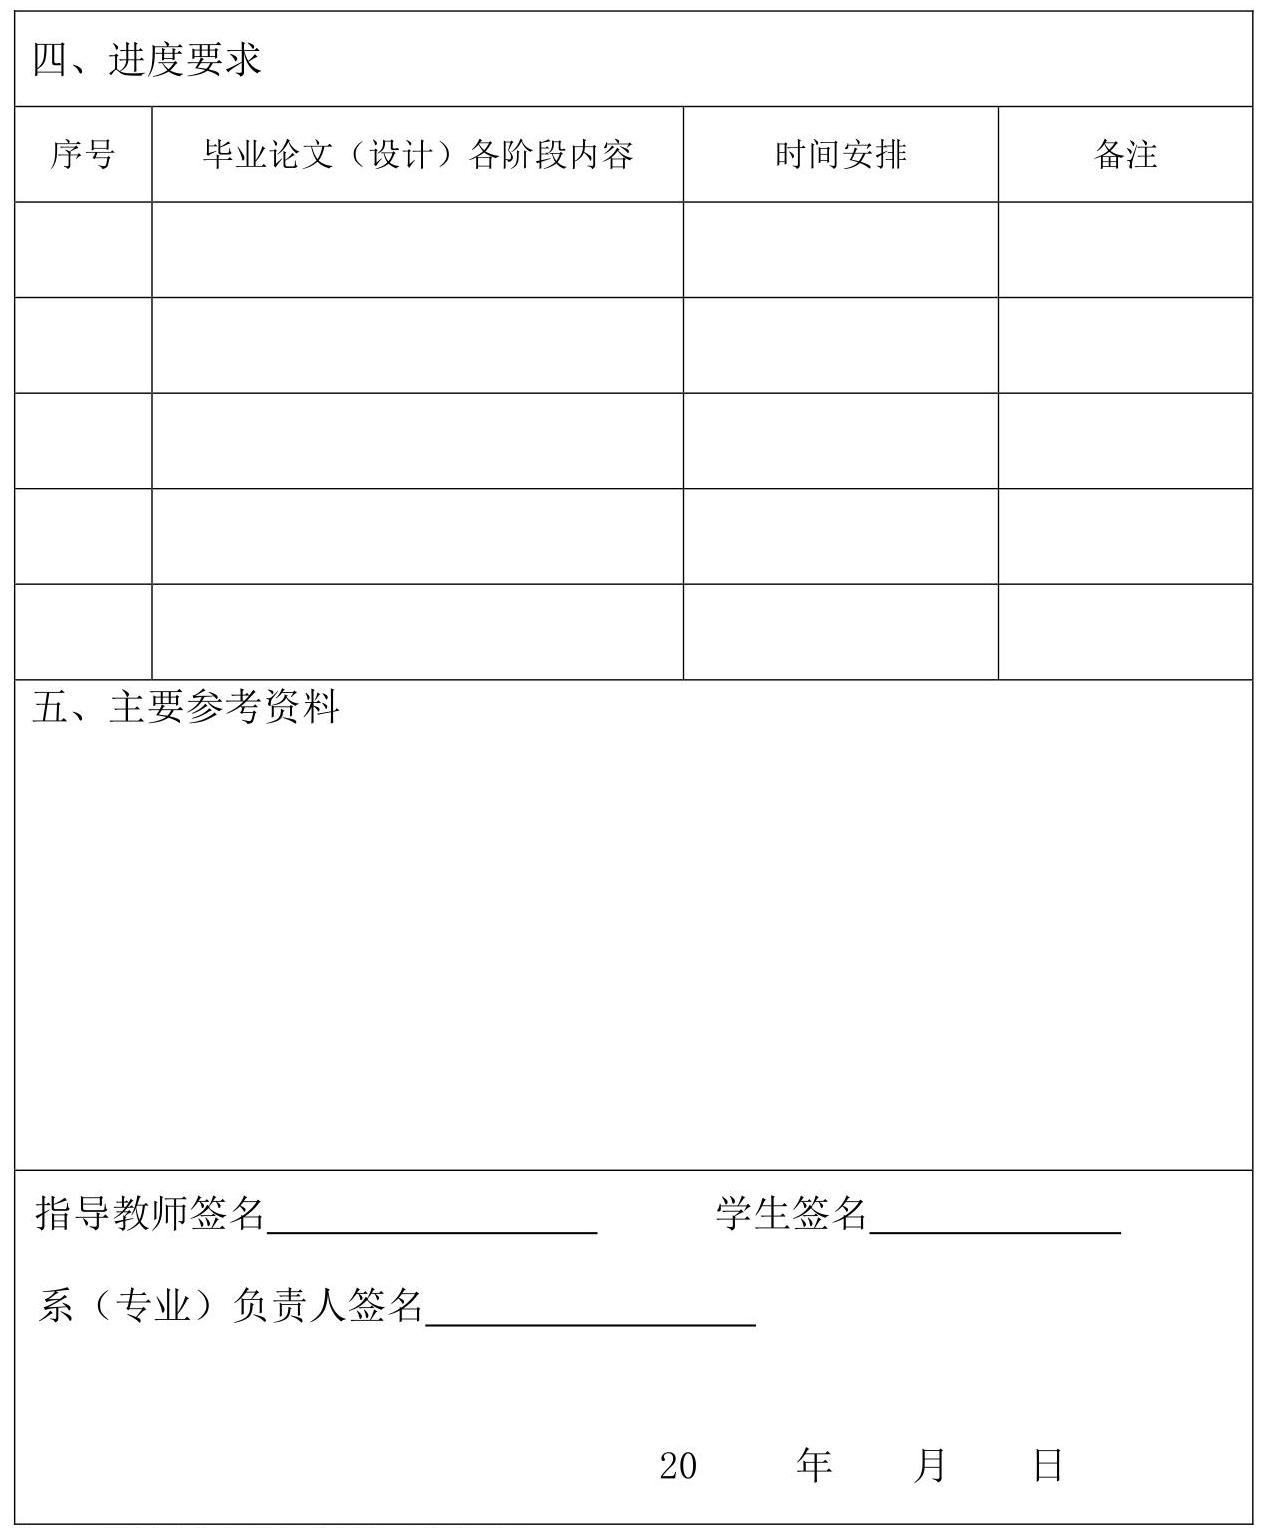
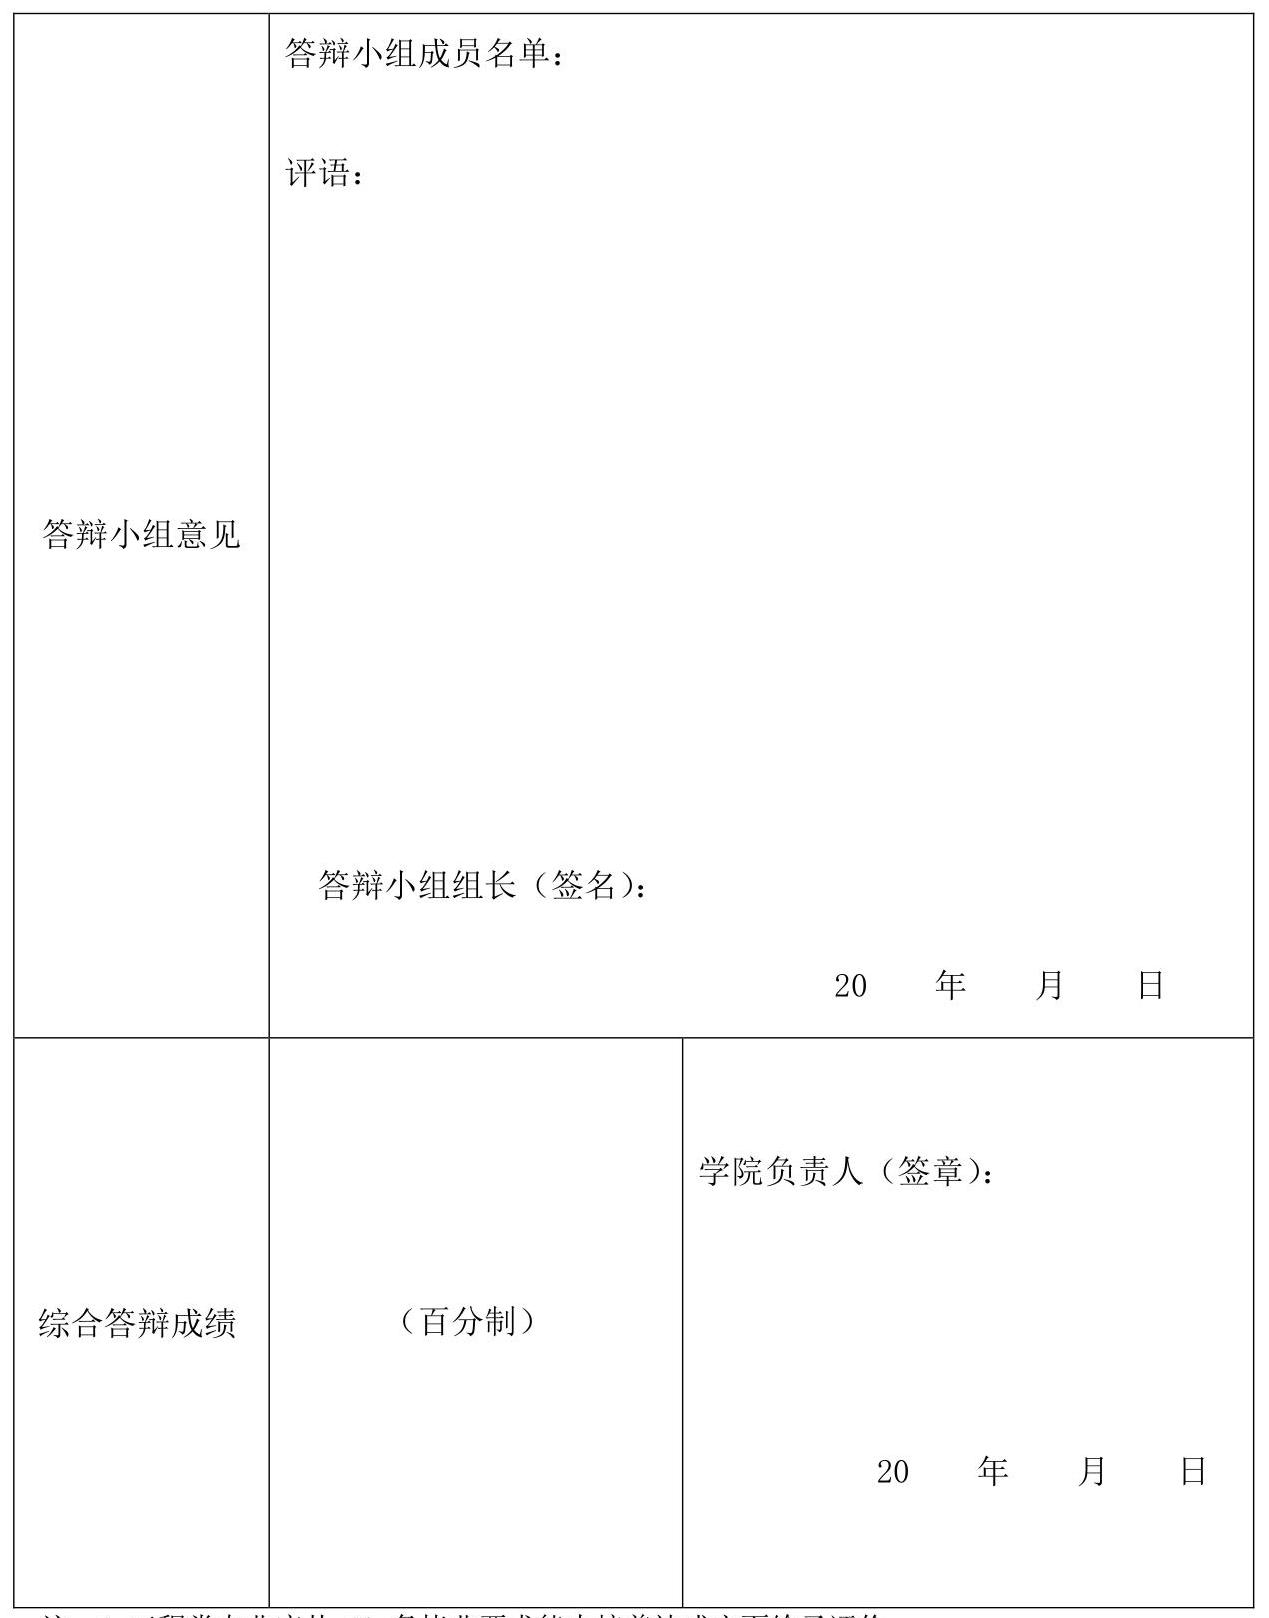
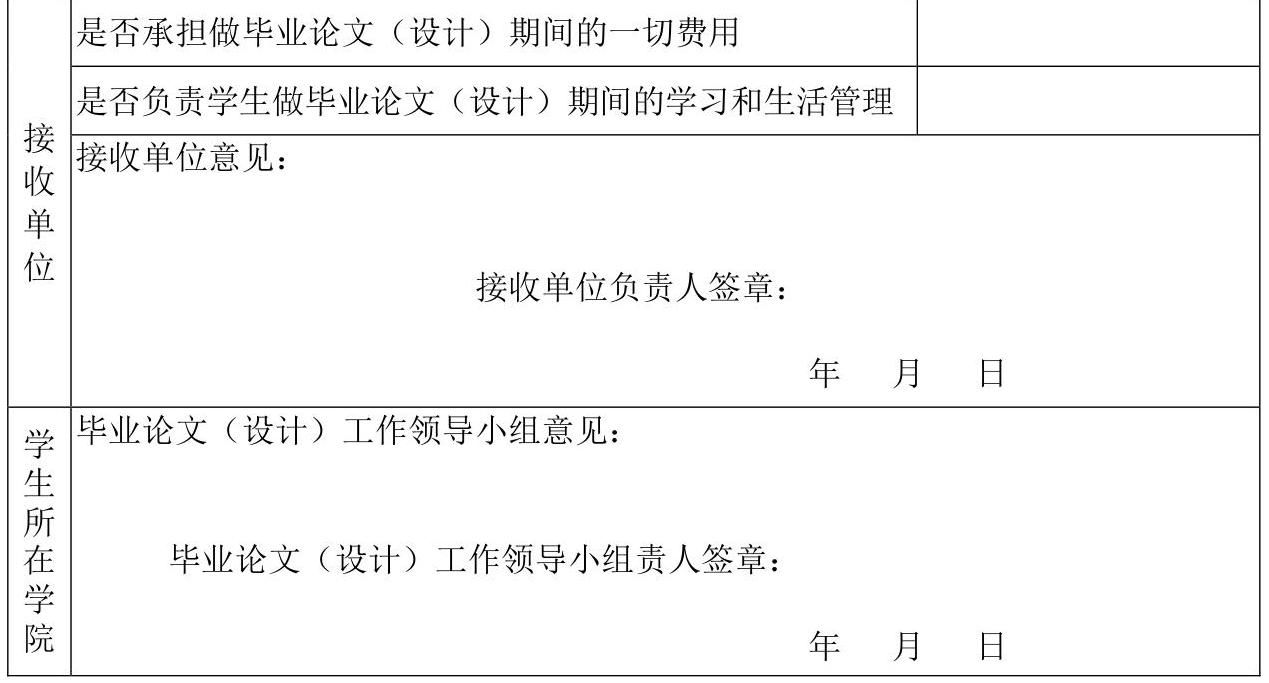
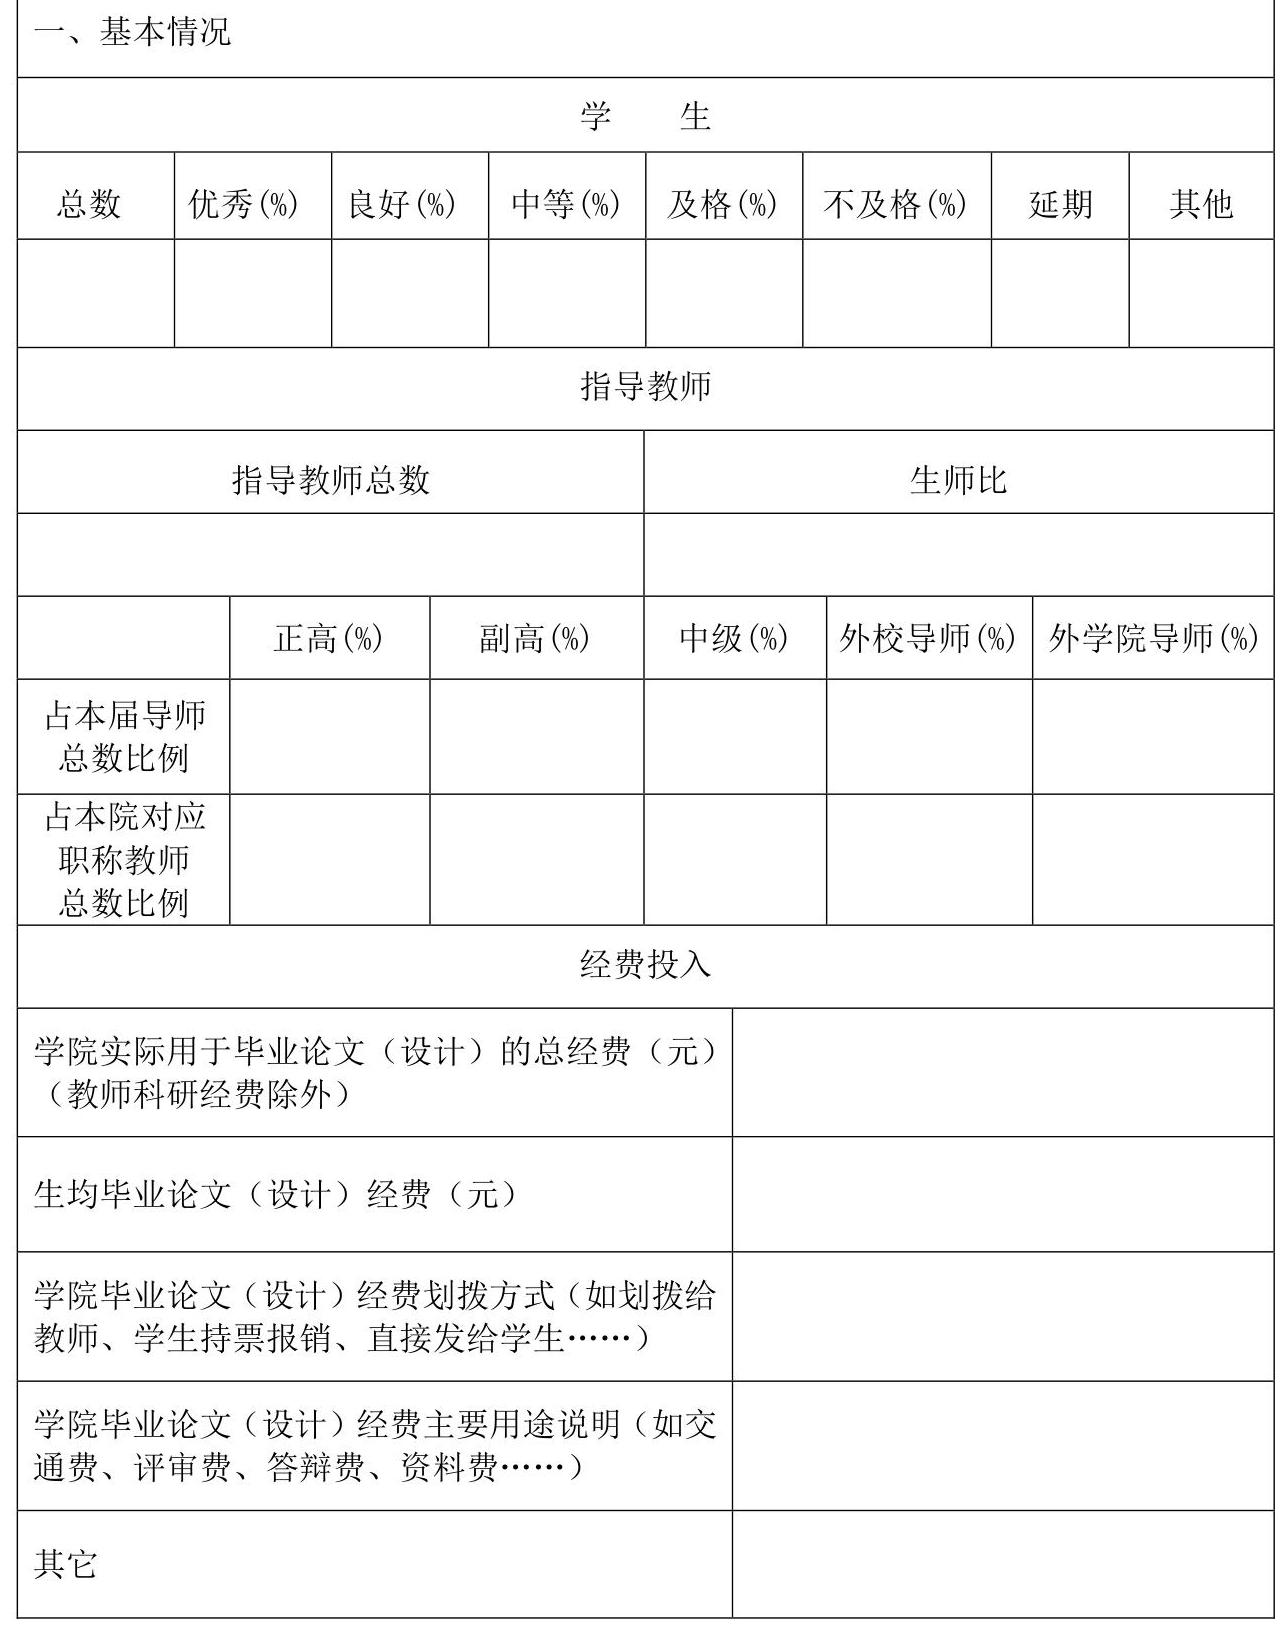
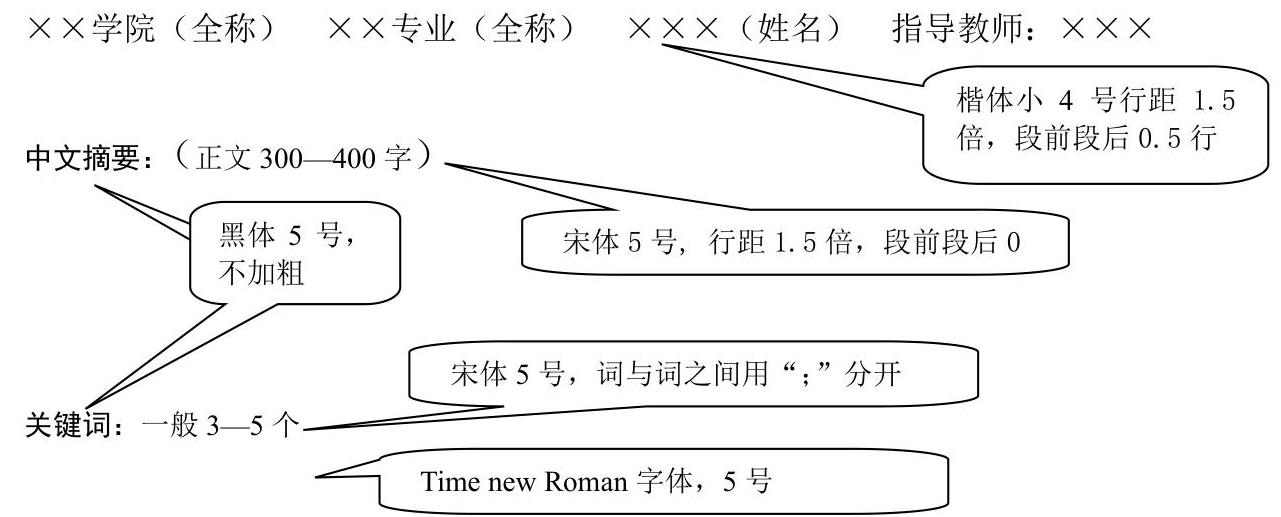
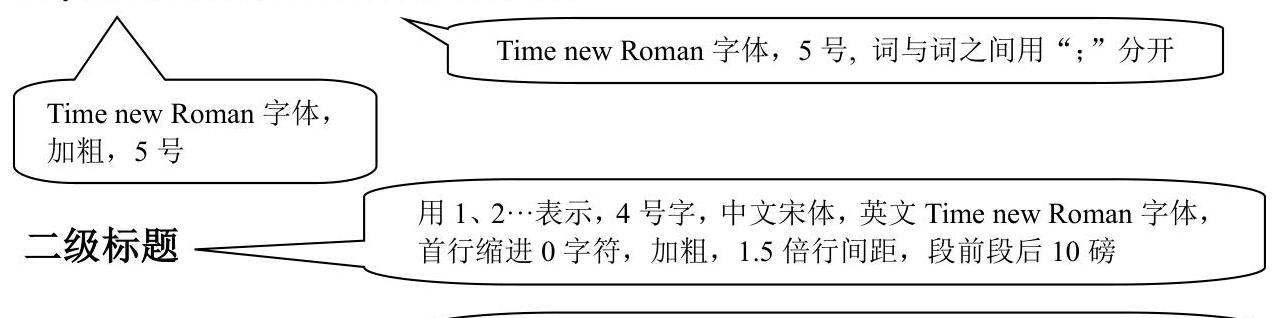
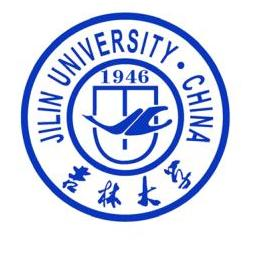

<ipython-input-10-793982fc17e2>:16: PydanticDeprecatedSince20: The `json` method is deprecated; use `model_dump_json` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.10/migration/
  response_dict = json.loads(pdf_response.json())


In [10]:
from mistralai import DocumentURLChunk, ImageURLChunk, TextChunk
import json

uploaded_file = client.files.upload(
    file={
        "file_name": pdf_file.stem,
        "content": pdf_file.read_bytes(),
    },
    purpose="ocr",
)

signed_url = client.files.get_signed_url(file_id=uploaded_file.id, expiry=1)

pdf_response = client.ocr.process(document=DocumentURLChunk(document_url=signed_url.url), model="mistral-ocr-latest", include_image_base64=True)

response_dict = json.loads(pdf_response.json())
json_string = json.dumps(response_dict, indent=4)
print(json_string)

*The OCR model can output interleaved text and images (set `include_image_base64=True` to return the base64 image ), we can view the result with the following:*

# 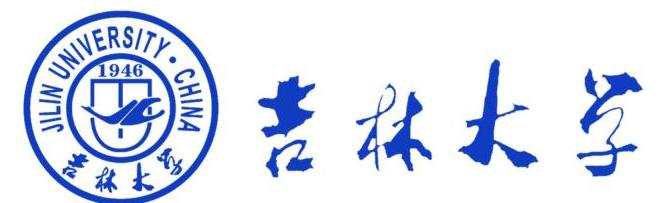 

## 本科毕业论文（设计） <br> 工作手册

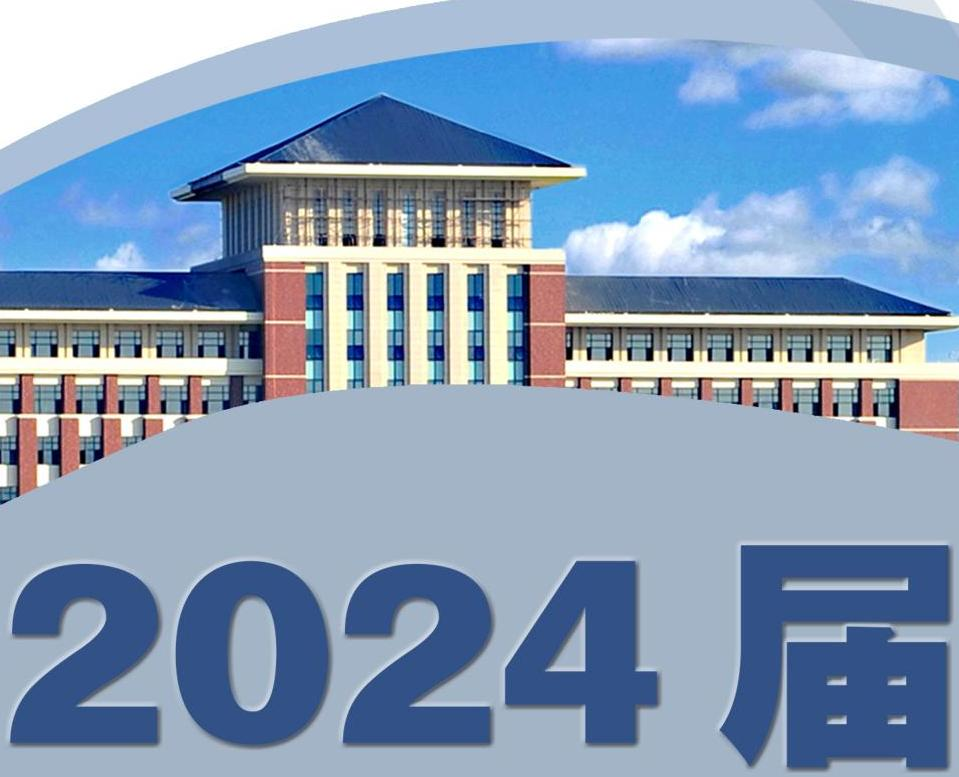

吉林大学教务处<br>二○二三年十月

# 目 录 

第一部分 高等学校预防与处理学术不端行为办法 ..... 1
第一章 总则 ..... 2
第二章 教育与预防 ..... 2
第三章 受理与调查 ..... 3
第四章 认定 ..... 6
第五章 处理 ..... 7
第六章 复核 ..... 8
第七章 监督 ..... 8
第八章 附则 ..... 9
第二部分 吉林大学本科毕业论文（设计）工作管理办法 ..... 12
第一章 总 则 ..... 12
第二章 教学目的与教学要求 ..... 12
第三章 教学组织管理及职责 ..... 12
第四章 教学过程管理 ..... 14
第五章 考核及成绩评定 ..... 16
第六章 校级优秀毕业论文（设计）评选 ..... 18
第七章 学生守则 ..... 19
第八章 附 则 ..... 19
第三部分 吉林大学本科毕业论文（设计）抽检工作实施细则 ..... 20
第一章 总则 ..... 20
第二章 工作程序 ..... 20

第三章 抽检结果使用 ..... 21
第四章 监督与保障 ..... 22
第五章 附则 ..... 22
第四部分 吉林大学本科毕业论文（设计）管理系统 ..... 23
"毕业论文（设计）管理系统"工作流程 ..... 23
"毕业论文（设计）管理系统"必填信息及生成表格 ..... 26
附表一：吉林大学本科毕业论文（设计）任务书 ..... 26
附表二：吉林大学本科毕业论文（设计）开题报告 ..... 28
附表三：吉林大学本科毕业论文（设计）版权使用授权书 ..... 30
附表四：吉林大学学士学位论文（设计）承诺书 ..... 31
附表五：吉林大学本科毕业论文（设计）答辩记录 ..... 32
附表六：吉林大学本科毕业论文（设计）答辩评审表 ..... 33
"毕业论文（设计）管理系统"选填信息及生成表格 ..... 35
附表七：吉林大学本科毕业论文（设计）题目论证书 ..... 35
附表八：吉林大学本科毕业论文（设计）题目调整申请表 ..... 36
附表九：吉林大学本科毕业论文（设计）英文撰写申请表 ..... 37
附表十：吉林大学本科生到校外（国内）做毕业论文（设计）登记表38
附表十一：吉林大学本科生赴境外单位做毕业论文（设计）申请表 ..... 39
附表十二：吉林大学本科毕业论文（设计）作品（实物）验收单 ..... 40
附表十三：吉林大学本科毕业论文（设计）中期检查表 ..... 41
附表十四：吉林大学本科毕业论文（设计）缓答辩申请表 ..... 42
附表十五：吉林大学本科毕业论文（设计）补答辩申请表 ..... 43
附表十六：吉林大学 XXX 学院****届本科生毕业论文（设计）工作
总结（格式） ..... 44

第五部分 吉林大学本科毕业论文（设计）撰写要求、书写格式及封面 46
吉林大学本科毕业论文（设计）撰写要求与书写格式（A4） ..... 46
优秀毕业论文（设计）的缩写格式 ..... 53
吉林大学本科毕业论文（设计）封面（格式） ..... 54

# 第一部分 高等学校预防与处理学术不端行为办法 

## 中华人民共和国教育部令

第 40 号

《高等学校预防与处理学术不端行为办法》已于2016年4月 5 日经教育部 2016 年第 14 次部长办公会议审议通过，现予发布，自2016年9月1日起施行。

教育部部长
2016年6月16日

# 高等学校预防与处理学术不端行为办法 

## 第一章 总则

第一条 为有效预防和严肃查处高等学校发生的学术不端行为, 维护学术诚信, 促进学术创新和发展, 根据《中华人民共和国高等教育法》、《中华人民共和国科学技术进步法》、《中华人民共和国学位条例》等法律法规，制定本办法。

第二条 本办法所称学术不端行为是指高等学校及其教学科研人员、管理人员和学生, 在科学研究及相关活动中发生的违反公认的学术准则、违背学术诚信的行为。

第三条 高等学校预防与处理学术不端行为应坚持预防为主、教育与惩戒结合的原则。

第四条 教育部、国务院有关部门和省级教育部门负责制定高等学校学风建设的宏观政策, 指导和监督高等学校学风建设工作, 建立健全对所主管高等学校重大学术不端行为的处理机制, 建立高校学术不端行为的通报和相关信息公开制度。

第五条 高等学校是学术不端行为预防与处理的主体。高等学校应当建设集教育、预防、监督、惩治于一体的学术诚信体系, 建立由主要负责人领导的学风建设工作机制, 明确职责分工; 依据本办法完善本校学术不端行为预防与处理的规则与程序。

高等学校应当充分发挥学术委员会在学风建设方面的作用, 支持和保障学术委员会依法履行职责, 调查、认定学术不端行为。

## 第二章 教育与预防

第六条 高等学校应当完善学术治理体系, 建立科学公正的学术评价

和学术发展制度，营造鼓励创新、宽容失败、不骄不躁、风清气正的学术环境。

高等学校教学科研人员、管理人员、学生在科研活动中应当遵循实事求是的科学精神和严谨认真的治学态度, 格守学术诚信, 遵循学术准则,尊重和保护他人知识产权等合法权益。

第七条 高等学校应当将学术规范和学术诚信教育, 作为教师培训和学生教育的必要内容，以多种形式开展教育、培训。

教师对其指导的学生应当进行学术规范、学术诚信教育和指导，对学生公开发表论文、研究和撰写学位论文是否符合学术规范、学生诚信要求,进行必要的检查与审核。

第八条 高等学校应当利用信息技术等手段, 建立对学术成果、学位论文所涉及内容的知识产权查询制度，健全学术规范监督机制。

第九条 高等学校应当建立健全科研管理制度，在合理期限内保存研究的原始数据和资料，保证科研档案和数据的真实性、完整性。

高等学校应当完善科研项目评审、学术成果鉴定程序，结合学科特点，对非涉密的科研项目申报材料、学术成果的基本信息以适当方式进行公开。

第十条 高等学校应当遵循学术研究规律, 建立科学的学术水平考核评价标准、办法, 引导教学科研人员和学生潜心研究, 形成具有创新性、独创性的研究成果。

第十一条 高等学校应当建立教学科研人员学术诚信记录，在年度考核、职称评定、岗位聘用、课题立项、人才计划、评优奖励中强化学术诚信考核。

# 第三章 受理与调查 

第十二条 高等学校应当明确具体部门，负责受理社会组织、个人对

本校教学科研人员、管理人员及学生学术不端行为的举报；有条件的，可以设立专门岗位或者指定专人，负责学术诚信和不端行为举报相关事宜的咨询、受理、调查等工作。

第十三条 对学术不端行为的举报，一般应当以书面方式实名提出，并符合下列条件:
（一）有明确的举报对象;
（二）有实施学术不端行为的事实；
（三）有客观的证据材料或者查证线索。
以匿名方式举报，但事实清楚、证据充分或者线索明确的，高等学校应当视情况予以受理。

第十四条 高等学校对媒体公开报道、其他学术机构或者社会组织主动披露的涉及本校人员的学术不端行为，应当依据职权，主动进行调查处理。

第十五条 高等学校受理机构认为举报材料符合条件的，应当及时作出受理决定，并通知举报人。不予受理的，应当书面说明理由。

第十六条 学术不端行为举报受理后，应当交由学校学术委员会按照相关程序组织开展调查。

学术委员会可委托有关专家就举报内容的合理性、调查的可能性等进行初步审查，并作出是否进入正式调查的决定。

决定不进入正式调查的，应当告知举报人。举报人如有新的证据，可以提出异议。异议成立的，应当进入正式调查。

第十七条 高等学校学术委员会决定进入正式调查的，应当通知被举报人。

被调查行为涉及资助项目的，可以同时通知项目资助方。
第十八条 高等学校学术委员会应当组成调查组，负责对被举报行为进行调查；但对事实清楚、证据确凿、情节简单的被举报行为，也可以采

用简易调查程序，具体办法由学术委员会确定。
调查组应当不少于 3 人，必要时应当包括学校纪检、监察机构指派的工作人员，可以邀请同行专家参与调查或者以咨询等方式提供学术判断。

被调查行为涉及资助项目的，可以邀请项目资助方委派相关专业人员参与调查组。

第十九条 调查组的组成人员与举报人或者被举报人有合作研究、亲属或者导师学生等直接利害关系的，应当回避。

第二十条 调查可通过查询资料、现场查看、实验检验、询问证人、询问举报人和被举报人等方式进行。调查组认为有必要的，可以委托无利害关系的专家或者第三方专业机构就有关事项进行独立调查或者验证。

第二十一条 调查组在调查过程中，应当认真听取被举报人的陈述、申辩，对有关事实、理由和证据进行核实；认为必要的，可以采取听证方式。

第二十二条 有关单位和个人应当为调查组开展工作提供必要的便利和协助。

举报人、被举报人、证人及其他有关人员应当如实回答询问，配合调查，提供相关证据材料，不得隐瞒或者提供虚假信息。

第二十三条 调查过程中，出现知识产权等争议引发的法律纠纷的，且该争议可能影响行为定性的，应当中止调查，待争议解决后重启调查。

第二十四条 调查组应当在查清事实的基础上形成调查报告。调查报告应当包括学术不端行为责任人的确认、调查过程、事实认定及理由、调查结论等。

学术不端行为由多人集体做出的，调查报告中应当区别各责任人在行为中所发挥的作用。

第二十五条 接触举报材料和参与调查处理的人员，不得向无关人员透露举报人、被举报人个人信息及调查情况。

# 第四章 认定 

第二十六条 高等学校学术委员会应当对调查组提交的调查报告进行审查；必要的，应当听取调查组的汇报。

学术委员会可以召开全体会议或者授权专门委员会对被调查行为是否构成学术不端行为以及行为的性质、情节等作出认定结论，并依职权作出处理或建议学校作出相应处理。

第二十七条 经调查，确认被举报人在科学研究及相关活动中有下列行为之一的，应当认定为构成学术不端行为：
（一）剽窃、抄袭、侵占他人学术成果；
（二）篡改他人研究成果；
（三）伪造科研数据、资料、文献、注释，或者捏造事实、编造虚假研究成果；
（四）未参加研究或创作而在研究成果、学术论文上署名，未经他人许可而不当使用他人署名，虚构合作者共同署名，或者多人共同完成研究而在成果中未注明他人工作、贡献;
（五）在申报课题、成果、奖励和职务评审评定、申请学位等过程中提供虚假学术信息；
（六）买卖论文、由他人代写或者为他人代写论文；
（七）其他根据高等学校或者有关学术组织、相关科研管理机构制定的规则，属于学术不端的行为。

第二十八条 有学术不端行为且有下列情形之一的，应当认定为情节严重:
（一）造成恶劣影响的；
（二）存在利益输送或者利益交换的；
（三）对举报人进行打击报复的；

（四）有组织实施学术不端行为的；
（五）多次实施学术不端行为的；
（六）其他造成严重后果或者恶劣影响的。

# 第五章 处理 

第二十九条 高等学校应当根据学术委员会的认定结论和处理建议，结合行为性质和情节轻重，依职权和规定程序对学术不端行为责任人作出如下处理:
(一) 通报批评;
（二）终止或者撤销相关的科研项目，并在一定期限内取消申请资格；
（三）撤销学术奖励或者荣誉称号；
（四）辞退或解聘；
（五）法律、法规及规章规定的其他处理措施。
同时，可以依照有关规定，给予警告、记过、降低岗位等级或者撤职、开除等处分。

学术不端行为责任人获得有关部门、机构设立的科研项目、学术奖励或者荣誉称号等利益的，学校应当同时向有关主管部门提出处理建议。

学生有学术不端行为的，还应当按照学生管理的相关规定，给予相应的学籍处分。

学术不端行为与获得学位有直接关联的，由学位授予单位作暂缓授予学位、不授予学位或者依法撤销学位等处理。

第三十条 高等学校对学术不端行为作出处理决定，应当制作处理决定书，载明以下内容：
（一）责任人的基本情况；
（二）经查证的学术不端行为事实；
（三）处理意见和依据；

（四）救济途径和期限：
（五）其他必要内容。
第三十一条 经调查认定，不构成学术不端行为的，根据被举报人申请，高等学校应当通过一定方式为其消除影响、恢复名誉等。

调查处理过程中，发现举报人存在捏造事实、诬告陷害等行为的，应当认定为举报不实或者虚假举报，举报人应当承当相应责任。属于本单位人员的，高等学校应当按照有关规定给予处理；不属于本单位人员的，应通报其所在单位，并提出处理建议。

第三十二条 参与举报受理、调查和处理的人员违反保密等规定，造成不良影响的，按照有关规定给予处分或其他处理

# 第六章 复核 

第三十三条 举报人或者学术不端行为责任人对处理决定不服的，可以在收到处理决定之日起 30 日内，以书面形式向高等学校提出异议或者复核申请。

异议和复核不影响处理决定的执行。
第三十四条 高等学校收到异议或者复核申请后，应当交由学术委员会组织讨论，并于 15 日内作出是否受理的决定。

决定受理的，学校或者学术委员会可以另行组织调查组或者委托第三方机构进行调查；决定不予受理的，应当书面通知当事人。

第三十五条 当事人对复核决定不服，仍以同一事实和理由提出异议或者申请复核的，不予受理；向有关主管部门提出申诉的，按照相关规定执行。

## 第七章 监督

第三十六条 高等学校应当按年度发布学风建设工作报告，并向社会

公开，接受社会监督。
第三十七条 高等学校处理学术不端行为推诿塞责、隐瞒包庇、查处不力的，主管部门可以直接组织或者委托相关机构查处。

第三十八条 高等学校对本校发生的学术不端行为，未能及时查处并做出公正结论, 造成恶劣影响的, 主管部门应当追究相关领导的责任, 并进行通报。

高等学校为获得相关利益，有组织实施学术不端行为的，主管部门调查确认后，应当撤销高等学校由此获得的相关权利、项目以及其他利益，并追究学校主要负责人、直接负责人的责任。

# 第八章 附则 

第三十九条 高等学校应当根据本办法, 结合学校实际和学科特点,制定本校学术不端行为查处规则及处理办法, 明确各类学术不端行为的惩处标准。有关规则应当经学校学术委员会和教职工代表大会讨论通过。

第四十条 高等学校主管部门对直接受理的学术不端案件，可自行组织调查组或者指定、委托高等学校、有关机构组织调查、认定。对学术不端行为责任人的处理，根据本办法及国家有关规定执行。

教育系统所属科研机构及其他单位有关人员学术不端行为的调查与处理，可参照本办法执行。

第四十一条 本办法自2016年9月1日起施行。
教育部此前发布的有关规章、文件中的相关规定与本办法不一致的,以本办法为准。

# 教育部直属高校工作办公室函件 

## 关于进一步加强学术道德建设，坚决杜绝

## 参与"网上论文交易"现象的通知

教直办函〔2004〕009号

## 各直属高校:

目前正是应届大学生和研究生提交毕业论文的时间，而一些网站借此机会通过网络向需求者出售论文。据有关网站宣称，这些论文的作者主要是一些部属高校的老师和研究生。这一情况已引起国务院有关领导的高度重视，并指示教育部要联合有关方面坚决制止这种现象的发生。为此，现对高校提出如下要求:

一、教育部直属高校是代表我国高等教育水平、在全国起示范作用的一批高等学校，其办学质量和声誉在全国具有较大的影响。而为他人的毕业论文充当 "枪手" 等一系列学术腐败现象尽管只是发生在极少数人身上的个别现象，甚至可能是某些网站的蓄意炒作，但也将严重损害部直属高校甚至于我国高等教育的整体形象。为此，除我部将会同有关部门严厉查处并取缔此类网站外，各高校要以此为警示，进一步高度重视学术道德规范问题，切实采取有效措施，严肃学术纪律，维护学术道德，为学校的健康发展营造优良的学术环境，也为净化整个社会的学术氛围做出贡献。

二、要大力加强师德、师风和学风建设。各高校要采取有效措施不断提高教师的思想道德水平和业务素质，增强其教书育人的使命感和责任感，同时要把教育、引导学生树立严谨治学的优良学风作为重要任务。要充分发挥院系和导师的作用，切实加强对各类学生毕业论文的指导和监督，关注学生毕业论文完成的整个过程，全面掌握动态信息。

三、各高校要严把毕业论文的评审关, 坚决杜绝弄虚作假、抄袭剽窃、论文买卖及充当 "枪手" 等有违学术道德的风气发展和蔓延。一旦有类似情况出现, 一经查实, 要严肃处理, 绝不姑息。要进一步深化教育教学改革, 建章立制, 严格要求, 确保并不断提高教育质量, 维护学校的社会声誉。

教育部直属高校工作办公室
二○○四年

# 第二部分 吉林大学本科毕业论文（设计）工作管理办法 

## 第一章 总 则

第一条 毕业论文（设计）是在本科教育阶段达成毕业要求、实现培养目标的重要教学环节。为了切实做好我校毕业论文（设计）工作，提高毕业论文（设计）质量，规范毕业论文（设计）工作管理，根据《高等教育法》《高等学校预防与处理学术不端行为办法》《吉林大学本科学生学籍管理规定》 《吉林大学学士学位授予工作细则（修订）》 《吉林大学本科培养方案》等相关规定，结合学校实际，制定本办法。

## 第二章 教学目的与教学要求

第二条 毕业论文（设计）的教学目的是要求学生运用所学的基本知识、基本理论和基本技能进行综合实践训练，培养其提出问题、分析并解决问题的能力和开拓进取的科学精神。

第三条 教学要求是培养学生理论联系实际的工作作风和严肃认真的科学态度。能够综合运用所学知识、独立分析和解决实际问题。

## 第三章 教学组织管理及职责

第四条 毕业论文（设计）工作在学校分管教学工作的副校长领导下，由教务处、学院、系（专业）分工负责，共同完成。

第五条 教务处具体组织和管理全校毕业论文（设计）工作。职责如下:
（一）研究、制定与毕业论文（设计）相关的指导性规章制度。

（二）负责管理、运维"吉林大学毕业论文（设计）管理系统"（以下简称"毕业论文（设计）管理系统"）。

（三）组织专家对学院毕业论文（设计）工作各阶段进展情况进行检查，督促工作进程，检查毕业论文（设计）质量。
（四）审核、评选"吉林大学优秀毕业论文（设计）"，颁发奖励证书；举办优秀毕业论文（设计）展览；编制《吉林大学本科优秀毕业论文 （设计）汇编》等。
（五）汇总各学院毕业论文（设计）成绩和毕业论文（设计）工作总结，提出改进意见，推广先进工作经验。

第六条 学院负责组织和管理本学院的毕业论文（设计）工作，具体由分管教学副院长负责，教学秘书协助。职责如下：
（一）制定实施细则。根据本办法制定本学院的毕业论文（设计）工作实施细则，在学院内公布并报教务处备案。
（二）制定教学标准。成立毕业论文（设计）工作领导小组，依据各专业培养方案及毕业要求，制定各专业毕业论文（设计）教学、评分标准，规定各专业学生能够进入毕业论文（设计）环节的学分要求。
（三）实施全程管理。检查监督各系（专业）毕业论文（设计）工作计划落实情况，组织拟题、审题、选题、开题、答辩、成绩评定、论文抽查、评价、推荐校级优秀毕业论文（设计），及时解决存在的问题。
（四）工作总结与质量分析。分析学生毕业论文（设计）学习效果，通过"毕业论文（设计）管理系统"做好毕业论文（设计）资料的上传、保存工作。

第七条 系（专业）是毕业论文（设计）工作管理的基本单位，主要履行以下职责：
（一）落实毕业论文（设计）任务，包括选聘校内外指导教师，审议并确定毕业论文（设计）选题，并报学院审批。

（二）确定本系（专业）学生的毕业论文（设计）时间、地点、方式、经费及所需实验设备的分配等。
（三）对毕业论文（设计）提出相关要求及注意事项。
（四）组织本系（专业）毕业论文（设计）答辩，确定各答辩小组成员并指定负责人，平衡各组进度及评分标准。

第八条 指导教师资格认定:
（一）指导教师应由具有一定教学工作经验、认真负责精神、较高教学和科研水平的讲师及以上职称的教师担任。
（二）学院教学委员会负责认定年度毕业论文（设计）指导教师资格。
第九条 指导教师应履行下列职责:
（一）在调查研究的基础上选定毕业论文（设计）题目，填写毕业论文（设计）任务书。
（二）指导、审查学生拟定毕业论文（设计）的工作进度、工作内容与方法，定期答疑（质疑）、检查学生毕业论文（设计）的工作进度。
（三）加强学术诚信教育。及时纠正学术不端行为，必要时向学院建议取消学生答辩资格。
（四）按照专业毕业论文（设计）教学大纲与教学标准要求，落实教学内容，审查毕业论文（设计）成果及定稿毕业论文（设计），指导学生做好毕业论文（设计）答辩准备。
（五）根据学院相关要求，配合校外指导教师及时掌握学生工作质量和进度情况。
（六）在毕业论文（设计）完成后，对学生进行全面考核，撰写评语，提出评分的初步意见。

# 第四章 教学过程管理 

第十条 学院开展毕业论文（设计）工作前，制定工作计划和安排，

公布相关管理规章制度，检查实践教学条件。
第十一条 开展毕业论文（设计）选题工作，基本要求如下：
（一）毕业论文（设计）的选题，应具有适当的深度、难度和工作量。
（二）多名学生共同参与同一研究项目，题目名称要有区别，学生不仅需要完成协作部分内容，还要完成自己的独立部分工作。
（三）采用师生双向选择方式进行选题。题目数量原则上应大于应做毕业论文（设计）学生的人数（ 1.2 倍以上为宜）。每个题目都必须先提供必要的资料、文献、数据和规范等依据。
（四）赴校外进行毕业论文（设计），选题为学院下达或经学院毕业论文（设计）工作领导小组审核认定的企（事）业单位确定的题目。
（五）指导教师在指导过程中认为论文（设计）题目必须调整的，在重新确定论文（设计）方向和选题后，须由学生填写《吉林大学本科毕业论文（设计）选题调整申请表》，经毕业论文（设计）工作领导小组审批后确定。
（六）采用"毕业论文（设计）管理系统"进行全过程信息化线上管理模式，论文题目须在学院备案后上传至"毕业论文（设计）管理系统"。

第十二条 选定题目后，指导教师向学生下达《吉林大学本科毕业论文（设计）任务书》，明确选题任务后学生完成开题报告。

第十三条 为确保毕业论文（设计）的质量，每位指导教师所指导的学生人数应适当，原则上每位教师指导同一届学生人数以不超过 5 名为宜。少数专业确因指导教师数量不足，指导人数可适当增加，但不得超过 8 名。指导教师由选题环节双向选择确定，经毕业论文（设计）工作领导小组审批后不得随意更换。

第十四条 学生在校外做毕业论文（设计）时，学院应聘请具有实际设计、实验或研究工作经验的中级以上专业技术职务的相关专业人员担任校外指导教师，同时选派本专业讲师及以上职称教师负责协同指导、掌握

进度、监控质量等工作。
第十五条 有中期检查需要的毕业论文（设计），学院可组织进行毕业论文（设计）中期检查，指导教师对照任务书规定的任务和技术指标，对毕业论文（设计）完成情况进行考核。

第十六条 毕业论文（设计）经指导教师审定通过后，于有效时间内在"毕业论文（设计）管理系统"中采用"学术不端检测系统"对毕业论文（设计）进行检测。毕业论文（设计）检测由学生自行操作，每名学生有 2 次检测机会，检测合格的毕业论文（设计）方可参加答辩及成绩评定，原则上 2 次检测均不合格的毕业论文（设计）不能参加答辩及成绩评定。

第十七条 学术不端检测的合格标准原则上为：理学、工学、农学、医学类专业的毕业论文（设计）复制比小于等于 $20 \%$ ，其他学科专业复制比小于等于 $10 \%$ 。

第十八条 指导教师应根据学生的毕业论文（设计）任务完成情况（含实物作品）、撰写规范程度给予全面审查。审查通过后在"毕业论文（设计）管理系统"中通过学生答辩资格申请，学生方能参加答辩。在校外做毕业论文（设计）的学生的答辩资格，由校内指导教师负责审查。

第十九条 赴校外进行毕业论文（设计）的学生，必须回学校答辩。校内指导教师依据掌握情况和校外指导教师综合评价撰写毕业论文（设计）指导教师评语。

# 第五章 考核及成绩评定 

第二十条 学院在"毕业论文（设计）管理系统"中设置答辩时间及分组情况。

第二十一条 学生的毕业论文（设计）答辩可采用线上或线下两种方式进行，线上必须采用视频答辩方式。答辩时间一般安排在完成毕业论文

（设计）环节的最后一周内。
第二十二条 学院成立答辩委员会，下设答辩组，答辩组由 5-7 名讲师及以上职称教师组成，副教授及以上职称的教师任组长。

第二十三条 学生简要报告毕业论文（设计）的主要内容，具体包括：
（一）论文（设计）工作的任务、目的和意义；
（二）所采用的主要原始资料或参考文献；
（三）论文（设计）的技术方法及主要工作；
（四）论文（设计）的基本结论和价值。
第二十四条 制作实物或创作作品的毕业设计，答辩组须进行实物 （作品）验收。

第二十五条 答辩过程须指定专人做好过程记录。对于线上答辩，同时要求全程录音录像，实现整个答辩过程可回溯、可复查，以确保线上答辩质量。答辩结束后将线上答辩音频、视频资料的压缩包上传至"毕业论文（设计）管理系统" 留存备查，非线上答辩不作录音录像要求。

第二十六条 学院须安排院级督学等对答辩过程进行全程监督检查。
第二十七条 答辩完成后，由毕业论文（设计）工作领导小组根据指导教师对学生毕业论文（设计）情况的汇报、审查意见和答辩情况评定学生毕业论文（设计）最终成绩，并在"毕业论文（设计）管理系统"录入成绩。评分标准由学院根据本科培养方案要求和专业特点制定。

第二十八条 毕业论文（设计）成绩按百分制进行评定。90—100 为优秀、 80 - 89 为良好、 70 - 79 为中等、 60 - 69 为及格、 59 分及以下为不及格，专业内成绩分布由学院确定。

第二十九条 有下列情形之一时毕业论文（设计）成绩为不合格：
（一）毕业论文（设计）中有原则性重大错误或基本没有完成任务；
（二）弄虚作假，有抄袭行为；
（三）答辩时概念不清，对主要问题无法回答；

（四）工作量严重不足。
第三十条 毕业论文（设计）阶段工作结束，学校将对所有应届本科毕业论文（设计）进行一次"学术不端检测"，同时也将抽调部分应届本科毕业论文（设计）开展校外盲评（审）工作，并公布审核结果。对于"学术不端检测"不合格的毕业论文（设计）将认定为不通过，由学校组织进行调查核实，对已查实的作弊、剽窃、抄袭等学术不端行为依法撤销已授予的学士学位。

第三十一条 学院在毕业论文（设计）教学工作结束后，要认真做好学院、系（专业）两部分工作总结，均需上传至"毕业论文（设计）管理系统"中。

# 第六章 校级优秀毕业论文（设计）评选 

第三十二条 各系（专业）在全面答辩结束后根据本系（专业）实际情况，从评为院级优秀毕业论文（设计）中按毕业生人数 $3 \%$ 的数量推荐参加校级优秀毕业论文（设计）评选，学校组成专家组按比例从推荐篇目中评选校级优秀毕业论文（设计）。

第三十三条 校级优秀毕业论文（设计）评选参考标准如下：
（一）选题符合专业培养目标，有利于综合训练与创新能力的培养；
（二）内容观点正确、论据充分、推理严密、计算准确，具有一定的创新性及实用性；
（三）文字表述清楚、简练流畅、逻辑性强、所提供的材料齐全、设计图纸及图表清晰、论文格式符合写作要求;
（四）推荐论文（设计）的"学术不端检测"文字复制比原则上应小于等于 $10 \%$ 。

第三十四条 教务处对各学院推荐的优秀毕业论文（设计）进行评审后，对获得优秀毕业论文（设计）的学生和指导教师颁发获奖证书。论文

（设计）的正本、图纸及附件等材料由教务处整理后，每学年编制《吉林大学本科生优秀毕业论文（设计）汇编》。

# 第七章 学生守则 

第三十五条 独立保质保量完成毕业论文（设计），不弄虚作假，不抄袭他人的成果。

第三十六条 遇事或生病，如请假 1 至 2 天，须经指导教师批准；请假 3 天以上，须经学院批准；累计旷课 5 天（含）或请假 2 周（含）者，不能参加答辩。

第三十七条 在毕业论文（设计）期间，按照要求及时认真地在"毕业论文（设计）管理系统"中填报各类材料。

第三十八条 赴校外进行毕业论文（设计）的，须向学院提出申请，获批后方可实施，在校外进行毕业论文（设计）时须定期向学院汇报工作进展情况。

## 第八章 附 则

第三十九条 毕业论文（设计）不及格的学生，允许在最大学制期限内回校补做毕业论文（设计）、参加答辩，具体选题和时间由学院、系（专业）安排。

第四十条 毕业论文（设计）经费由教务处拨付各学院，标准由教务处根据学科实际情况确定。

第四十一条 本办法适用于全校除临床医学、口腔医学、护理学及临床药学专业以外的所有专业。

第四十二条 本办法由教务处负责解释。
第四十三条 本办法经学校教学委员会修订通过，自颁布之日起生效。原《吉林大学本科毕业论文（设计）工作管理办法（试行）》同时废止。

# 第三部分 吉林大学本科毕业论文（设计）抽检工作实施细则 

## 第一章 总则

第一条 按照《深化新时代教育评价改革总体方案》《关于深化新时代教育督导体制机制改革的意见》《本科毕业论文（设计）抽检办法（试行）》（教督〔2020〕5 号）《吉林大学一流本科实践教学提升行动计划》校教字〔2021〕13号《吉林大学本科毕业论文（设计）工作管理办法》 （校教字〔2020〕117号）文件精神，为加强本科毕业论文（设计）全过程管理，提升本科毕业论文（设计）质量，特制定本细则。

## 第二章 工作程序

第二条 教务处负责本科毕业论文（设计）（以下简称毕业论文）抽检的统筹组织工作。

第三条 本科毕业论文抽检工作遵循"独立、客观、科学、公正"的原则，任何单位和个人都不得以任何方式干扰抽检工作的正常进行。

第四条 本科毕业论文抽检每学年进行一次，覆盖全部本科专业，所有抽检论文均聘请校内外同行专家进行评审，评审将对毕业论文的选题意义、写作安排、逻辑构建、专业能力及学术规范等方面进行考察。抽检时间为毕业论文答辩之前，抽检对象为本学年拟参加毕业答辩的论文，抽检数量基于各学院参加答辩的本科毕业生人数并采取按比例随机抽取的方式确定。

第五条 教务处利用"毕业论文（设计）管理系统"中的"学术不端检测系统"对所抽检的毕业论文进行检测，检测结果供同行专家作为评审

参考。
第六条 校内外同行专家对抽检论文进行线上评审并提出评审意见。每篇毕业论文送 3 位同行专家评审，所有收回的评审意见均有效。

第七条 论文评审专家对毕业论文的评审意见分为:
A. 同意进行论文答辩;
B. 修改后本次可以进行论文答辩;
C.不同意进行论文答辩。

第八条 专家评审意见处理办法:
（一）若评审意见均为"A"，则可以进行论文答辩。
（二）若评审意见中有"B"，将认定为"需修改毕业论文"，各学院告知相关学生根据专家评审意见进行修改，修改后的毕业论文需经指导教师同意后方能参加论文答辩。
（三）若评审意见中有"C"，则本次答辩申请无效。若学生及其指导教师对评审意见有异议，可提出申辩理由，以书面形式报送学院教学委员会。教学委员会召开会议进行审议，若审议通过，应形成书面报告，经签字后报教务处，由教务处另外聘请两位专家进行评审。两位专家的评审意见均为"A"，可进行论文答辩；若评审意见有"B"，将认定为"需修改毕业论文"，毕业论文需修改后提交学院教学委员会评审，通过后方能参加论文答辩，若评审意见有"C"，则不能答辩。

第九条 本科毕业论文抽检结果由教务处向各学院反馈，并以适当方式向全校公开。

# 第三章 抽检结果使用 

第十条 本科毕业论文抽检结果的使用:
（一）对连续 2 年有"C"，且比例较高或篇数较多的本科专业，教务处约谈相关学院主要负责领导并提出限期整改要求。

（二）对连续 3 年抽检存在问题较多的学院，视为不能保证本科阶段培养质量，予以全校通报。
（三）对涉嫌存在抄袭、剽窃、伪造、篡改、买卖、代写等学术不端行为的本科毕业论文，按照相关程序进行调查核实，一经查实，将取消相应学生本科毕业论文答辩资格或成绩。
（四）抽检结果将作为本科教育教学评估、一流本科专业建设、本科专业认证以及专业建设经费投入等教育资源配置的重要参考依据。

# 第四章 监督与保障 

第十一条 教务处对各学院本科毕业论文抽检工作情况开展监督检查。

第十二条 教务处将本科毕业论文抽检工作经费列入年度工作预算，确保抽检工作顺利开展。

第十三条 各学院应按照要求，准确完整地提供本科毕业论文等材料。

## 第五章 附则

第十四条 本办法由教务处负责解释。
第十五条 本办法自发布之日起施行。

# 第四部分 吉林大学本科毕业论文（设计）管理系统 

## "毕业论文（设计）管理系统"工作流程

## 华业论文（设计）工作小组

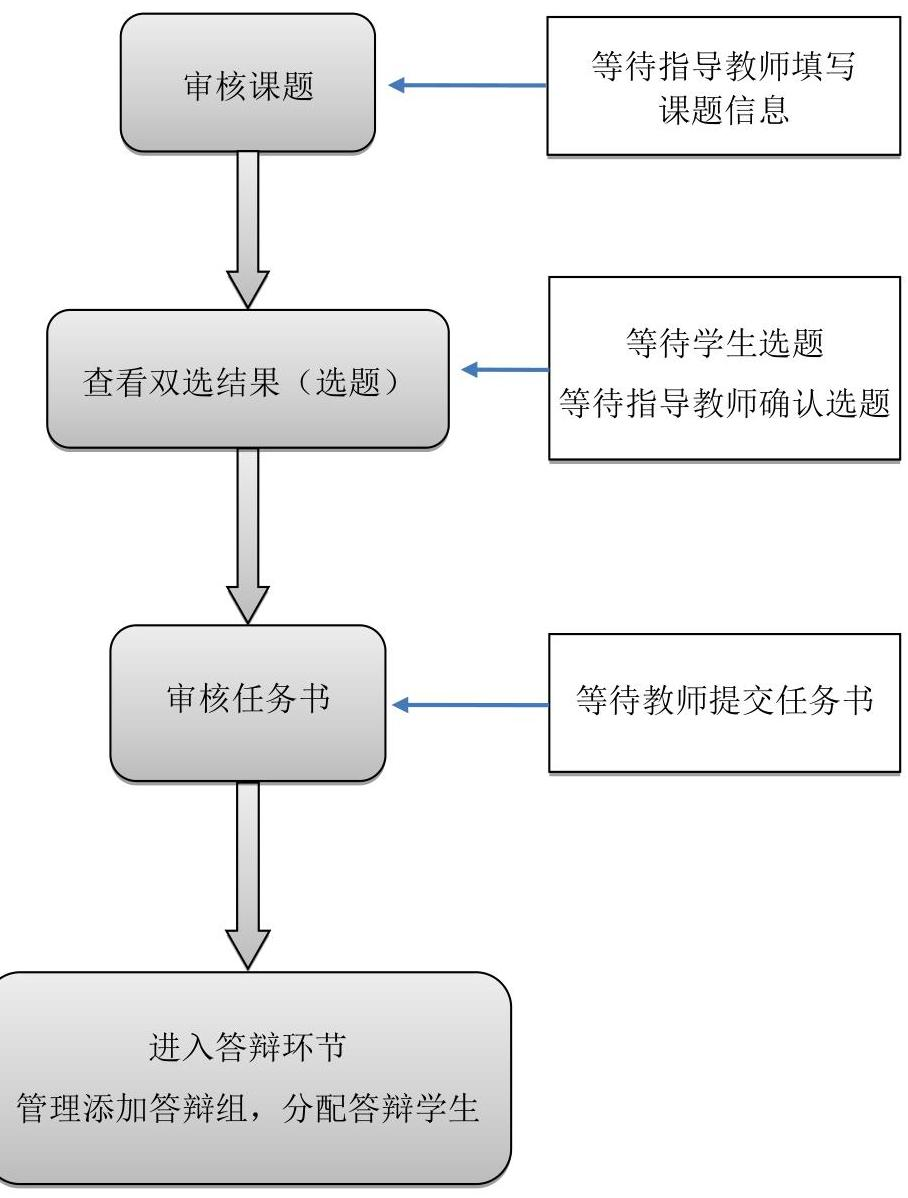

# 指导教师 

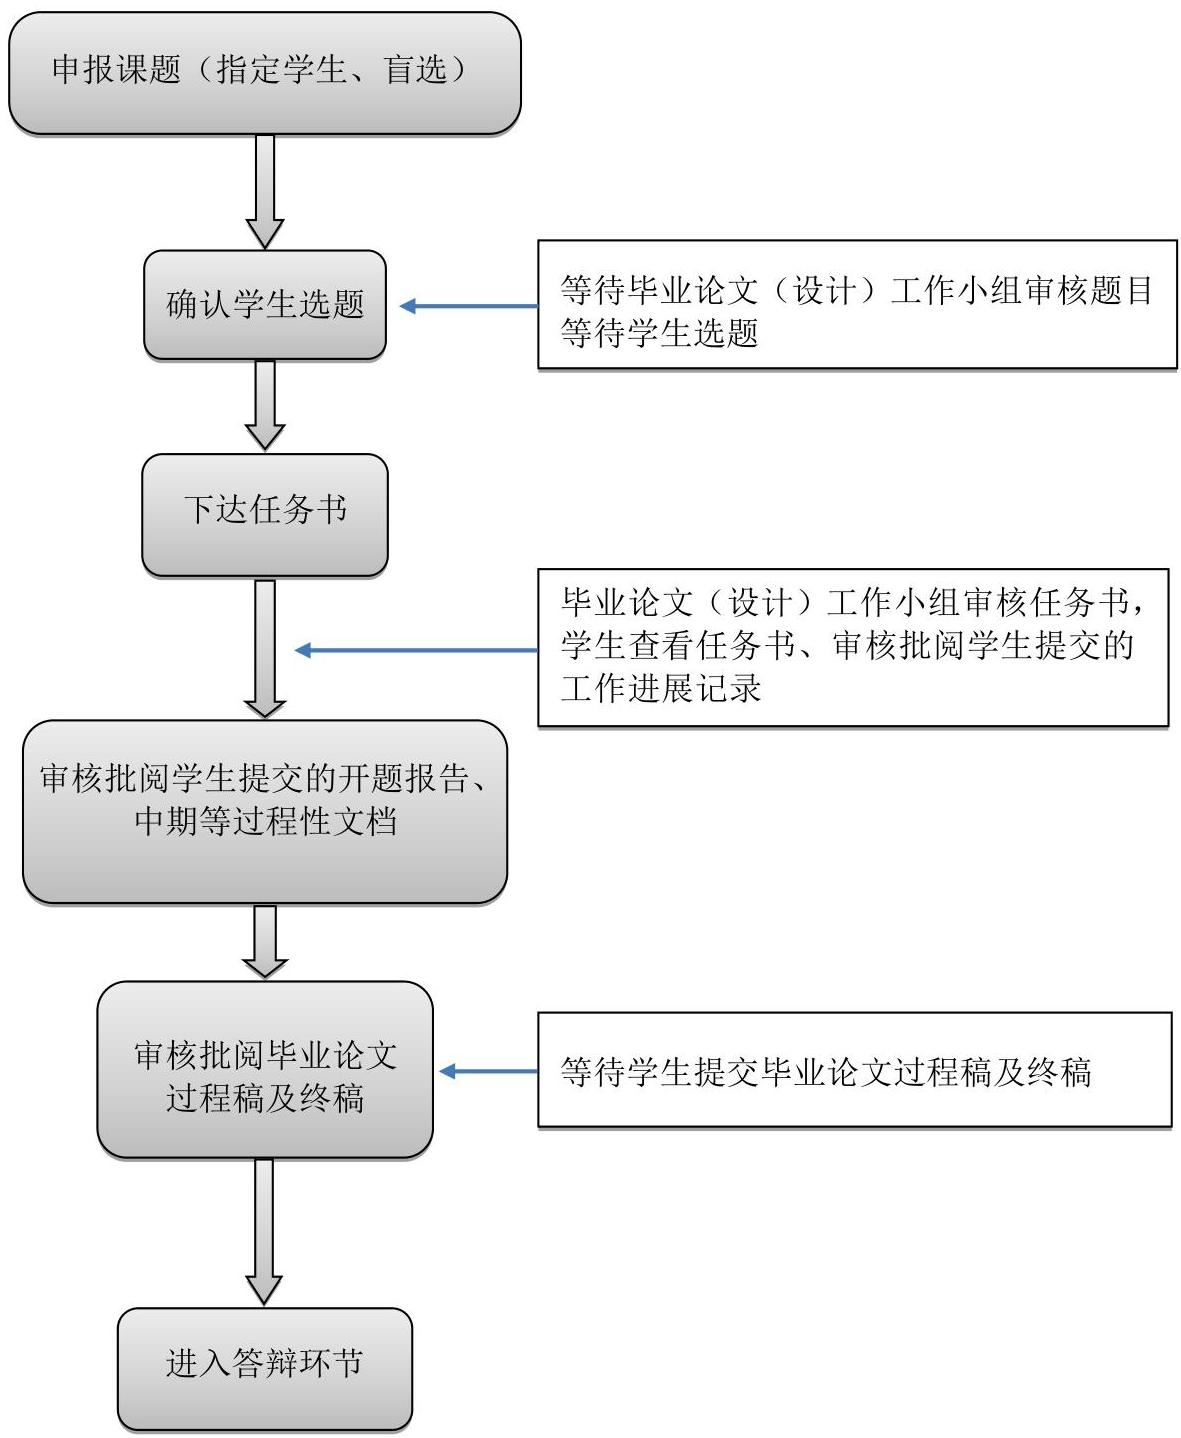

# 学 生 

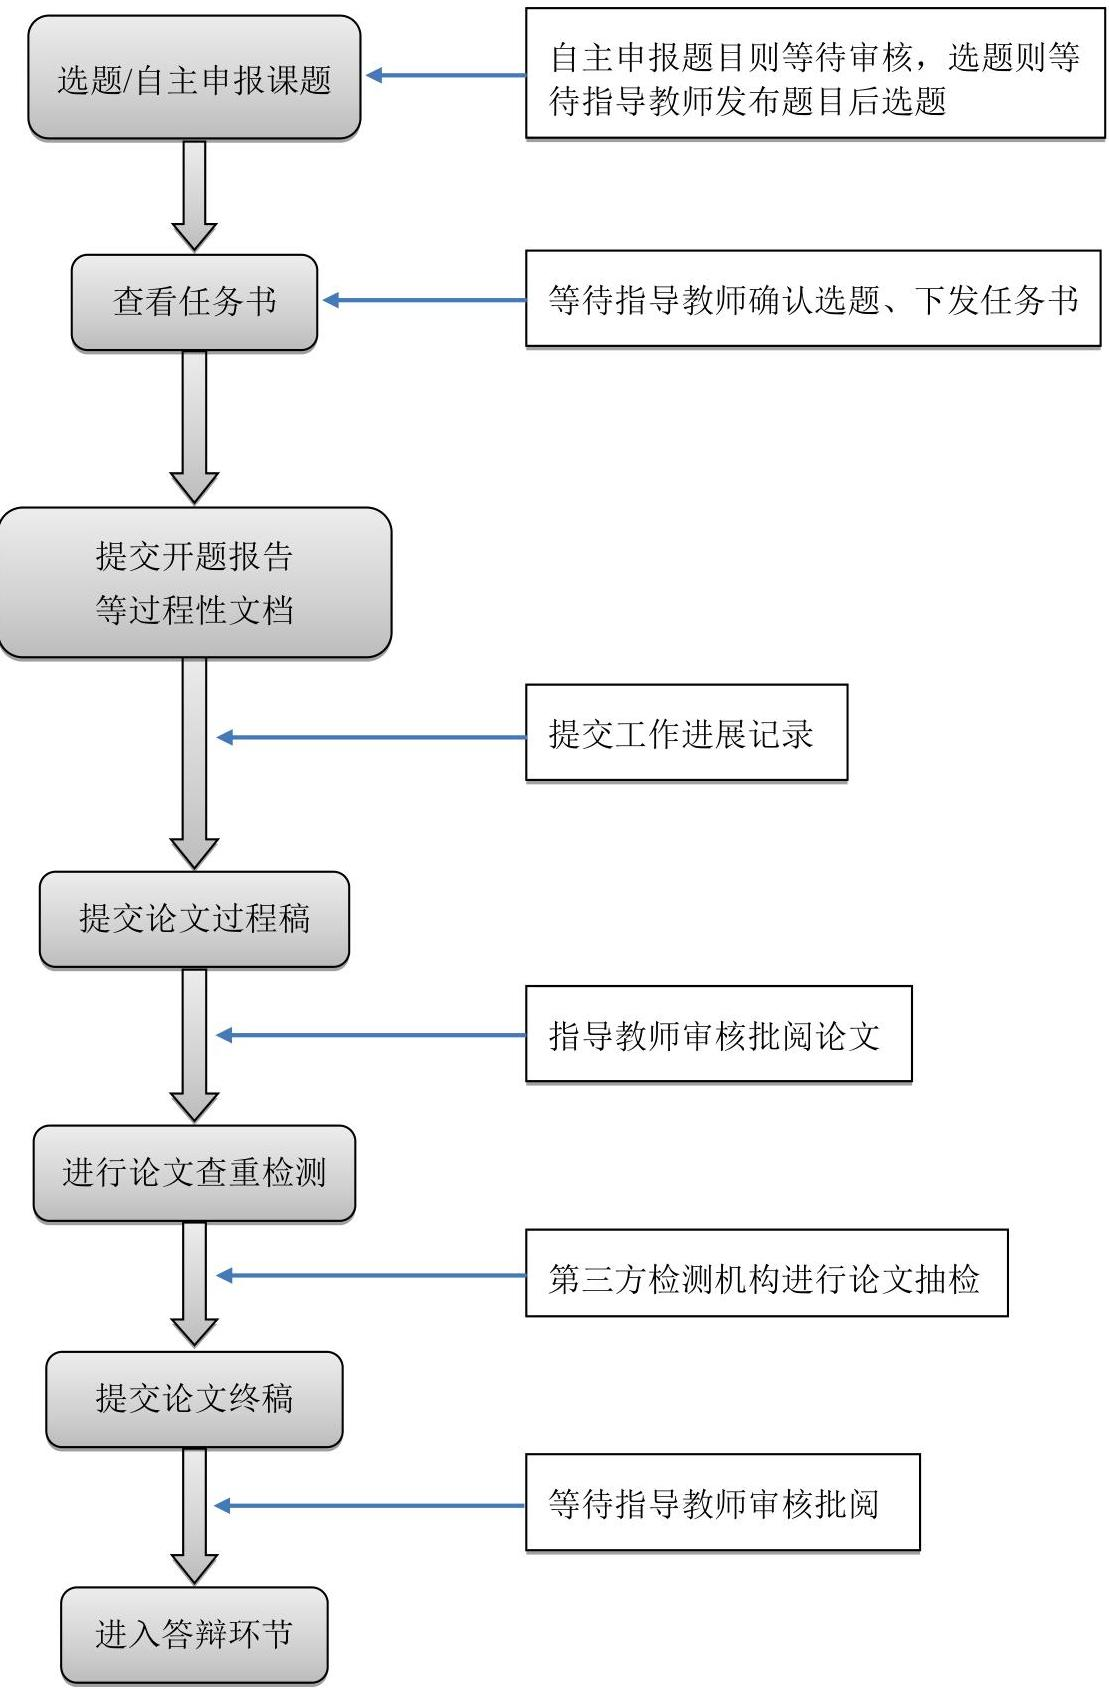

# "毕业论文（设计）管理系统"必填信息及生成表格（教师填写） 

附表一:
吉林大学本科毕业论文（设计）任务书

| 学 院 |  | 专 业 |  |
| :--: | :--: | :--: | :--: |
| 学生姓名 |  | 教学号 |  |
| 指导教师 |  | 职 称 |  |
| 校外指导教师 <br> 及其所属单位 |  | 职 称 |  |
| 题目来源 |  | 题目性质 |  |

一、毕业论文（设计）题目：
二、选题的背景意义及培养目标

## 三、毕业论文（设计）的研究内容和任务要求

1. 主要研究内容以及技术指标要求

理学、工学、信息学、地学、农学、医学类专业：含外文翻译、主要技术指标要求、实验与调研内容等方面。

人文、社科、管理学类专业：含外文翻译、调研或实训内容等。
2. 任务要求
(1) 外文翻译要求
(2) 开题报告要求
（3）毕业论文（设计）实验或调研要求
(4) 毕业设计图量要求
（5）毕业设计研发报告或毕业论文撰写要求等。

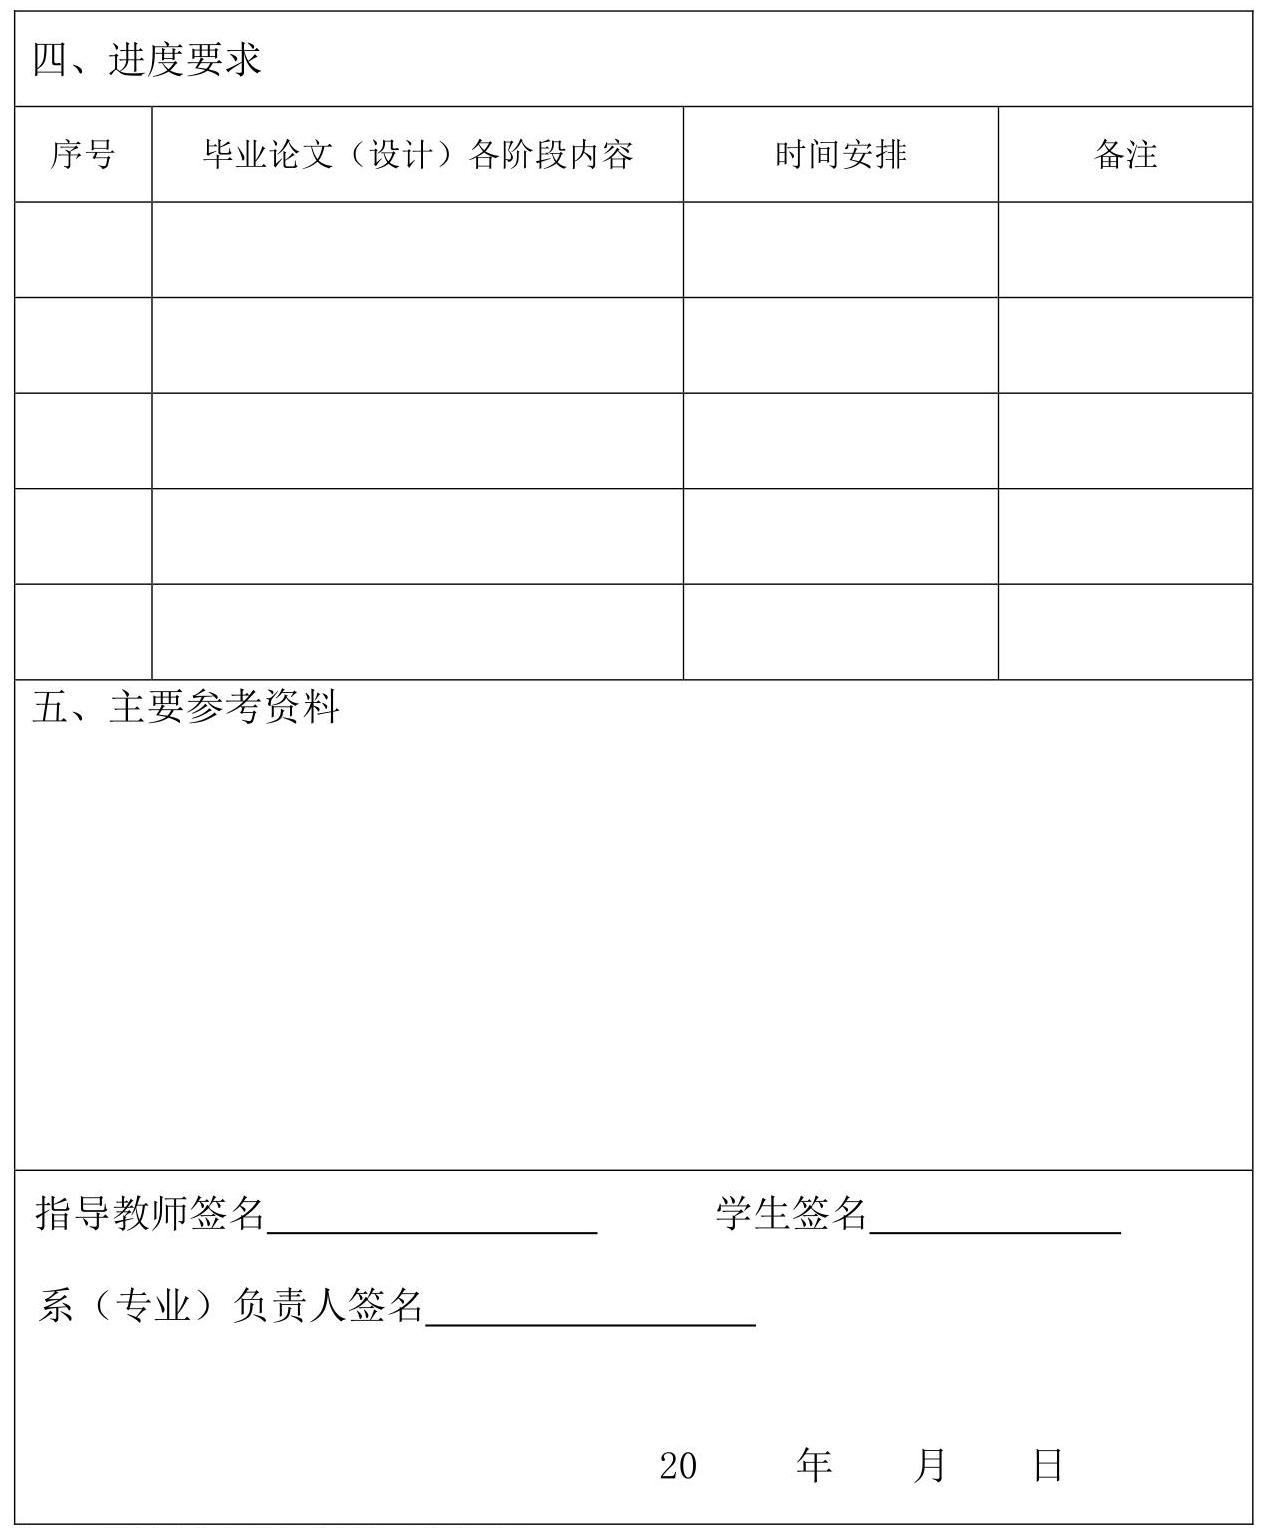

注：1. 若无"校外指导教师"，可不填写：
2. 题目来源：国家级项目、省部级项目、校级项目、学校科研任务、校外协作项目、实验室建设、就业所在单位项目、预研课题、自选；
3. 课题目性质：设计、论文；
4. 任务书由指导教师填写、系（专业）负责人审核，学生、指导教师、系（专业）负责人均应签名；
5. 此任务书要求在毕业论文（设计）工作中学生填写开题报告前下达。

# "毕业论文（设计）管理系统"必填信息及生成表格（学生填写） 

## 附表二：

吉林大学本科毕业论文（设计）开题报告

| 学 院 | 专 业 |  |
| :--: | :--: | :--: |
| 学生姓名 | 教学号 |  |
| 指导教师 | 职 称 |  |
| 校外指导教师及其 <br> 所属单位 | 职 称 |  |
| 课题来源 | 课题性质 |  |
| 论文（设计）题目 |  |  |
| 一、课题研究的背景和意义（综述国内外相关研究现状，阐述课题的研究目的、意义等） |  |  |

二、题目研究内容、可行性分析及拟解决的关键问题和难点（可说明是否具有前沿性和创新性）

# 三、研究方法或技术路线（重点论述技术方案） 

人文、社科、管理学类专业，可不填写或自行删除此项。

四、进度安排

五、主要参考文献

六、指导教师意见

指导教师签名:
20 年 月 日

注：1. 若无"校外指导教师"，可不填写：
2. 题目来源：国家级项目、省部级项目、校级项目、学校科研任务、校外协作项目、实验室建设、就业所在单位项目、预研课题、自选；
3. 题目性质：设计、论文；
4. 此表由学生填写。

# "毕业论文（设计）管理系统"必填信息及生成表格 (教师、学生电子签名) 

## 附表三:

## 吉林大学本科毕业论文（设计）版权使用授权书

本毕业论文（设计）作者同意学校保留并向国家有关部门或机构送交论文的复印件和电子版，允许论文被查阅和借阅。本人授权吉林大学可以将本毕业论文（设计）的全部或部分内容编入有关数据库进行检索，可以采用影印、缩印或扫描等复制手段保存和汇编本毕业论文（设计）。

保密 $\square$ ，在 $\qquad$年解密后适用本授权书。

本论文属于
不保密 $\square$ 。
（请在以上方框内打 " $\sqrt{ }$ "）

作者签名:
指导教师签名：

日期：年月日
日期：年月日

# "毕业论文（设计）管理系统"必填信息及生成表格 （学生电子签名） 

## 附表四:

## 吉林大学学士学位论文（设计）承诺书

本人郑重承诺：所呈交的学士学位毕业论文（设计），是本人在指导教师的指导下，独立进行实验、设计、调研等工作基础上取得的成果。除文中已经注明引用的内容外，本论文（设计）不包含任何其他个人或集体已经发表或撰写的作品成果。对本人实验或设计中做出重要贡献的个人或集体，均已在文中以明确的方式注明。本人完全意识到本承诺书的法律结果由本人承担。

承诺人:

年 月 日

# "毕业论文（设计）管理系统"必填信息及生成表格（答辩组填写） 

## 附表五:

## 吉林大学本科毕业论文（设计）答辩记录

论文（设计）题目：

| 学 院 | 专 业 |  |
| :--: | :--: | :--: |
| 学生姓名 | 教学号 |  |
| 指导教师 | 职 称 |  |
| 校外指导教师及其所属单位 | 职 称 |  |

答辩组成员

| 组长 |  | 职称 |  | 成员 |  | 职称 |  |
| :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: |
| 成员 |  | 职称 |  | 成员 |  | 职称 |  |
| 成员 |  | 职称 |  | 成员 |  | 职称 |  |
| 答辩时间 | 20 年 | 月 | 日 | 答辩记录人 |  |  |  |

陈述、提问及回答情况记录:
（本栏目填写学生论文汇报情况，答辩小组成员提问、学生回答等答辩过程情况）
（要求：1. 提问每生 3 个以上技术类、专业类问题；2. 每生陈述、提问、回答时间须 20 分钟。）

答辩组成员签字:
年 月 日

# "毕业论文（设计）管理系统"必填信息及生成表格 （答辩组、教师填写） 

## 附表六:

吉林大学本科毕业论文（设计）答辩评审表

| 学 院 | 专 业 |  |
| :--: | :--: | :--: |
| 学生姓名 | 教学号 |  |
| 指导教师 | 职 称 |  |
| 校外指导教师 <br> 及其所属单位 | 职 称 |  |
| 课题来源 | 课题性质 |  |
| 论文（设计）题目 |  |  |
| 是否有成果（实物作品或公开发表的论文、论著及获奖作品） |  | 有 / 无 |
| 评阅人意见 | 评语：（从选题、学术材料技术含量水平、创新、分析问题、解决问题能力、动手能力、图表、文字规范等方面给出合适的评价。） |  |
|  |  |  |
|  |  |  |

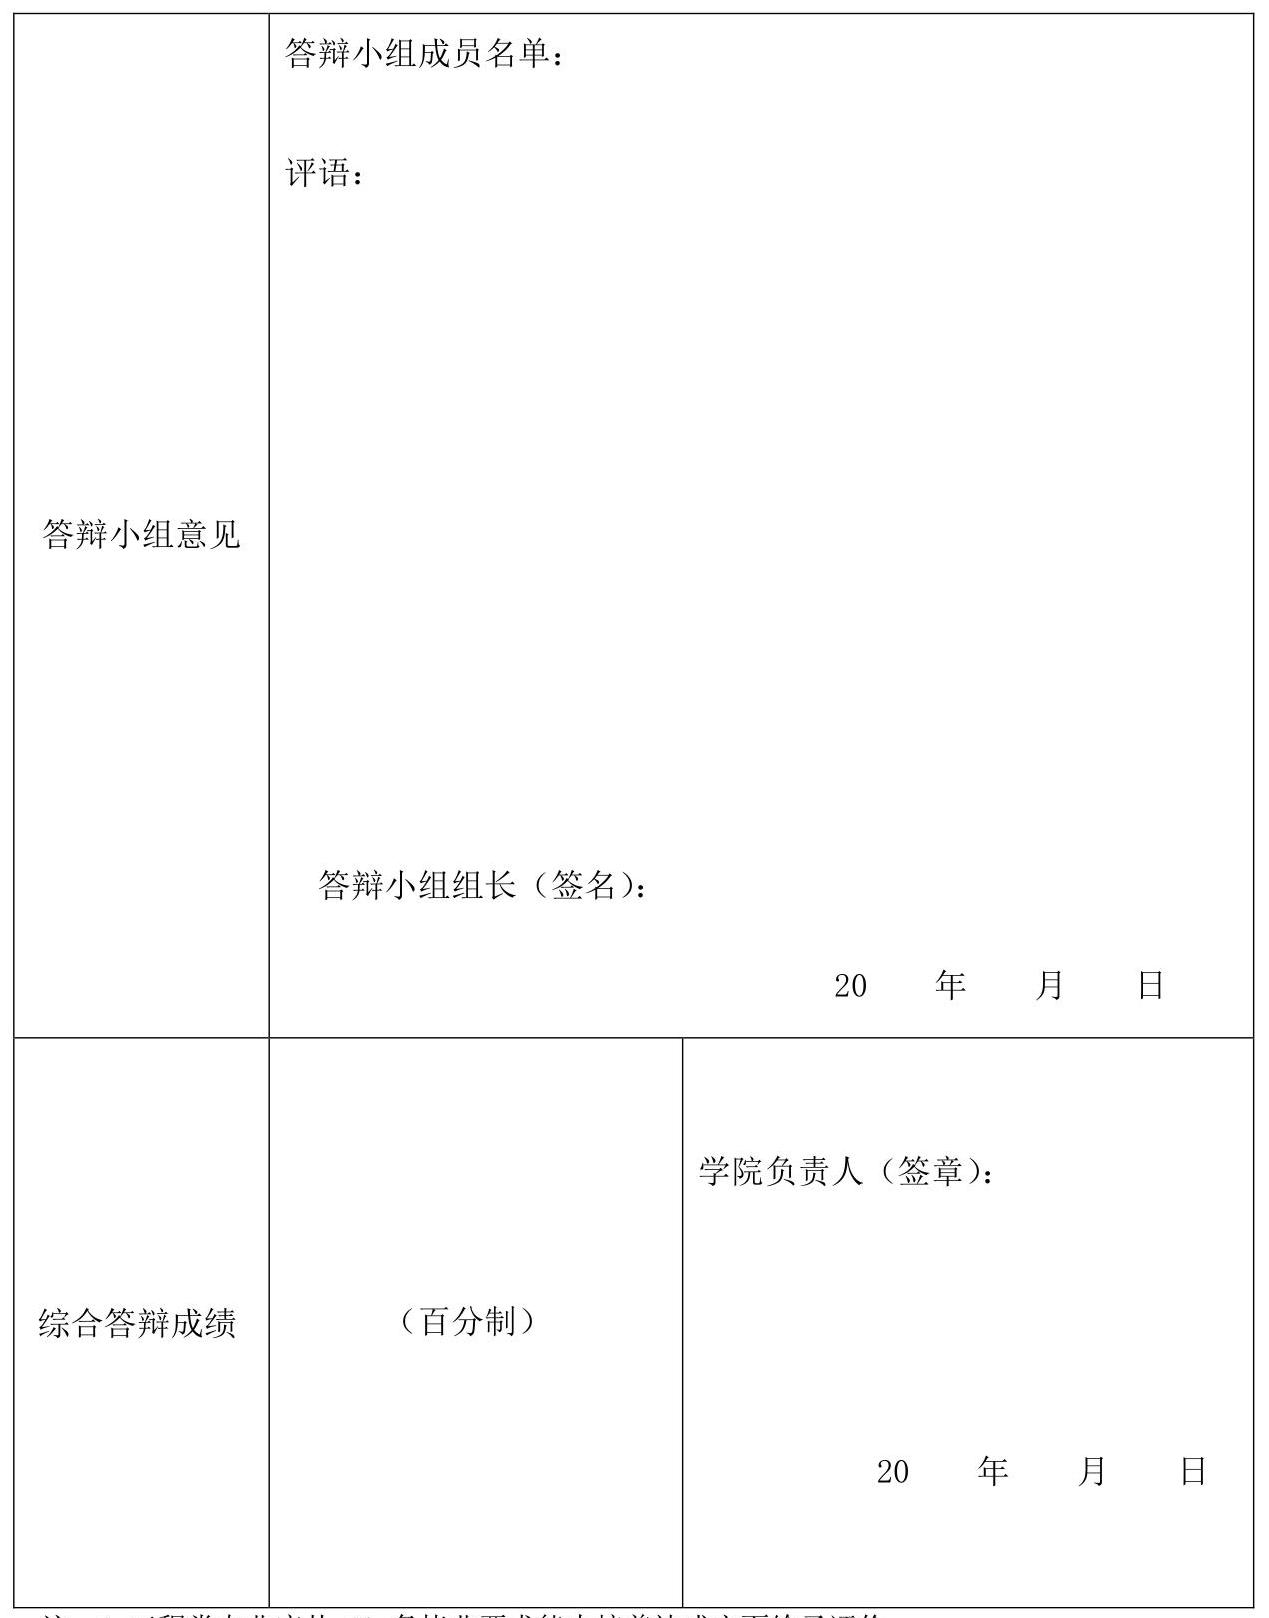

注：1. 工程类专业应从 12 条毕业要求能力培养达成方面给予评价；
2. 毕业论文（设计）答辩成绩按百分制进行评定，90-100 为优秀、80-90 为良好、70-79 为中等、60-69 为及格、59 分及以下为不及格，专业内成绩分布由学院确定。

# "毕业论文（设计）管理系统"选填信息及生成表格（教师填写） 

## 附表七:

## 吉林大学本科毕业论文（设计）选题论证书

| 题目名称 |  |  |  |
| :--: | :--: | :--: | :--: |
| 拟题教师 |  | 系（教研室） |  |
| 职称 |  | 专业 |  |
| 合作导师 |  | 职称 |  |
| 题目来源 | 国家级项目、省部级项目、校级项目、学校科研任务、校外协作项目、实验室建设、就业所在单位项目、预研课题、自选 |  |  |
| 题目性质 | 设计（）论文（）其他（） |  |  |

选题背景、具体内容及基本要求

# "毕业论文 (设计) 管理系统"选填信息及生成表格 (教师、学生填写) 

## 附表八:

吉林大学本科毕业论文（设计）选题调整申请表

| 学 院 | 专 业 |  |
| :--: | :--: | :--: |
| 学生姓名 | 教学号 |  |
| 指导教师 | 职 称 |  |
| 校外指导教师及其所属单位 | 职 称 |  |
| 原论文 (设计)题目 |  |  |
|  | 题目来源 |  | 题目性质 |  |
| 变更论文 (设计)题目 |  |  |  |  |
|  | 题目来源 |  | 题目性质 |  |
| 课题调整理由：（不少于 200 字） |  |  |  |  |
|  | 学生签名: |  |  |  |
|  |  |  | 20 | 年 月 日 |

指导教师意见：

指导教师签名:
20 年 月 日
毕业论文（设计）工作领导小组意见：

组长签名:

# "毕业论文（设计）管理系统"选填信息及生成表格（学生填写） 

## 附表九:

## 吉林大学本科毕业论文（设计）英文撰写申请表

| 学 院 | 专 业 |  |
| :--: | :--: | :--: |
| 学生姓名 | 教学号 |  |
| 指导教师 | 职 称 |  |
| 校外指导教师及其所属单位 | 职 称 |  |
| 题目中文名称 |  |  |
| 题目英文名称 |  |  |
| 申请原因: |  |  |
|  |  |  |
| 指导教师意见: |  |  |
|  |  |  |
|  | 年 月 日 |  |

毕业论文（设计）工作领导小组意见：

毕业论文（设计）工作领导小组负责人签章：

# "毕业论文（设计）管理系统"选填信息及生成表格（学生填写） 

## 附表十:

吉林大学本科生到校外（国内）做毕业论文（设计）登记表

| 学 院 | 专 业 |  |
| :--: | :--: | :--: |
| 学生姓名 | 教学号 |  |
| 论文（设计）题目： |  |  |
| 是否修满必修和选修课学分 | 第八（十）学期是否选课 |  |
| 校内指导教师姓名 | 职称 | 联系电话 |
| 校外指导教师姓名 | 职称 | 联系电话 |
|  |  |  |
|  |  |  |
|  |  |  |
|  | 研究方向 |  |
| 目前从事科研项目 |  |  |
|  |  |  |
| 接收意见： |  |  |

校外指导教师签名:
年 月 日
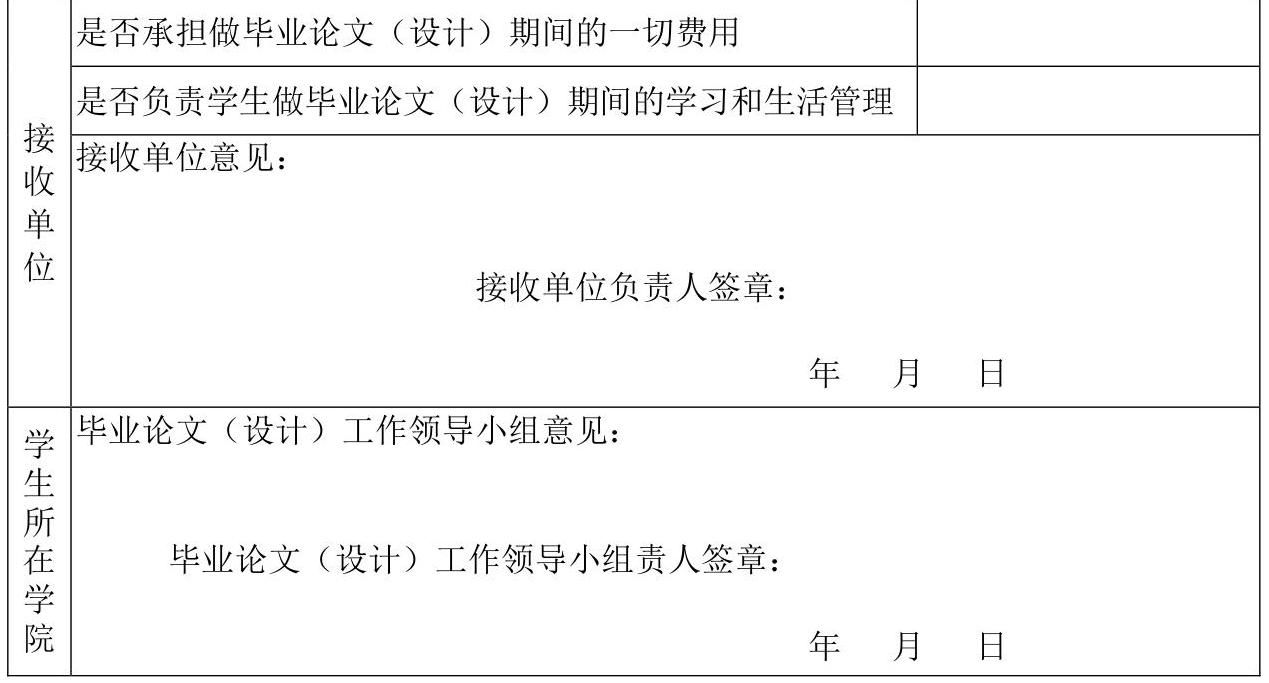

# "毕业论文（设计）管理系统"选填信息及生成表格（学生填写） 

## 附表十一:

## 吉林大学本科生赴境外单位做毕业论文（设计）申请表

| 学生姓名 |  | 学号 |  | 所在院系 |  |
| :--: | :--: | :--: | :--: | :--: | :--: |
| 接收单位 |  |  |  |  |  |
| 校内指导教师姓名 |  | 职称 |  | 邮箱及电话 |  |
| 校外指导教师姓名 |  | 职称 |  | 邮箱及电话 |  |
| 论文（设计）题目 |  |  |  |  |  |
| 起止时间 |  | 年 $\qquad$ 月 $\qquad$ 日至 $\qquad$ 年 $\qquad$ 月 $\qquad$ 日 |  |  |  |

## 学生承诺:

1. 本人严格遵守所在单位的各项规章制度，自觉注意保障人身安全；购买意外伤害保险及人身保险；在境外期间如发生任何人身意外，责任和费用均由本人承担；
2. 未经指导教师同意，不从事其他与毕业论文（设计）工作无关的活动；
3. 因故外出事先向指导教师请假；
4. 在境外期间与辅导员、教学秘书和家长保持联系；
5. 因出境学习交流而导致不能正常毕业，由学生本人承担所有责任和后果；
6. 需按学校毕业论文（设计）的要求完成，按时返校参加答辩；
7. 本人已阅读并清楚以上事项。

学生签字: $\qquad$日期: $\qquad$

家长签字: $\qquad$日期: $\qquad$

家庭住址: $\qquad$家长联系电话: $\qquad$

学院（系）意见:

学院负责人签字:
年 月 日

注：1. 茜附境外单位接受（邀请）函；
2. 经毕业论文（设计）工作领导小组同意后报教务处备案。

# "毕业论文（设计）管理系统"选填信息及生成表格（学生填写） 

## 附表十二:

吉林大学本科毕业论文（设计）作品（实物）验收单

| 学 院 | 专业 |  |
| :-- | :-- | :-- |
| 学生姓名 | 学号 |  |
| 论文(设计)题目 |  |  |
| 一、作品(实物)说明 |  |  |

二、支撑材料（测试报告及作品照片等）

三、指导教师评语

指导教师签名：
验收人签名：
年 月 日

# "毕业论文（设计）管理系统"选填信息及生成表格（学生填写） 

## 附表十三:

## 吉林大学本科毕业论文（设计）中期检查表

|  | 中检日期： |  |  | 月 | 日 |
| :--: | :--: | :--: | :--: | :--: | :--: |
| 学 院 |  | 专 业 |  |  |  |
| 学生姓名 |  | 教学号 |  |  |  |
| 指导教师 |  | 职 称 |  |  |  |
| 校外指导教师及其所属单位 |  | 职 称 |  |  |  |
| 题目来源 |  | 题目性质 |  |  |  |
| 论文（设计）题目： |  |  |  |  |  |
| 论文（设计） <br> 工作进展 |  |  |  |  |  |
| 存在的问题 <br> 及解决方案 |  |  |  |  |  |
| 后续工作计划 <br> 和研究内容 |  |  |  |  |  |
| 指导教师意见 |  |  |  |  |  |

注：1. 若无"校外指导教师"，可不填写：
2. 题目来源：国家级项目、省部级项目、校级项目、学校科研任务、校外协作项目、实验室建设、就业所在单位项目、预研课题、自选；
3. 题目性质：设计、论文；
4. 本表由学生填写。

# "毕业论文（设计）管理系统"选填信息及生成表格（学生填写） 

## 附表十四:

## 吉林大学本科毕业论文（设计）缓答辩申请表

| 学 院 | 专 业 |  |
| :--: | :--: | :--: |
| 学生姓名 | 教学号 |  |
| 指导教师 | 职 称 |  |
| 校外指导教师及其所属单位 | 职 称 |  |
| 题目来源 | 题目性质 |  |
| 论文（设计）题目 |  |  |
| 预计缓答辩时间 | 年 月 日 |  |
| 申请缓 <br> 答辩理由 | 申请人签名： |  |
| 指导教师 <br> 意见 | 指导教师签名： |  |
| 所在院/系 <br> 意见 | 学院（系）负责人签字（公章）： |  |
| 教务处 <br> 意见 | 负责人签字（公章）： |  |
| 注：1. 除毕业论文（设计）外已经符合毕业条件，且因客观原因无法按时进行答辩的同学（需附相关证明），可申请缓答辩，因毕业论文（设计）质量不合格未获答辩资格者不得申请缓答辩； 2. 学生需在学院规定时间内申请，逾期不予接受。经院系审核通过后，报教务处备案。 |  |  |

# "毕业论文（设计）管理系统"选填信息及生成表格（学生填写） 

## 附表十五：

## 吉林大学本科毕业论文（设计）补答辩申请表

| 学 院 | 专 业 |  |
| :--: | :--: | :--: |
| 学生姓名 | 教 学 号 |  |
| 指导教师 | 职 称 |  |
| 校外指导教师 <br> 及其所属单位 | 职 称 |  |
| 题目来源 | 题目性质 |  |
| 原答辩成绩 | 预计补答辩时间 | 年 月 日 |
| 论文（设计）题目 |  |  |
| 申请补 <br> 答辩理由 | 申请人签名： |  |
| 指导教师 <br> 意见 | 指导教师签名： |  |
| 所在院系 <br> 意见 | 学院（系）负责人签字（公章）： |  |
| 教务处 <br> 意见 | 负责人签字（公章）： | 年 月 日 |

注：1. 毕业论文（设计）答辩不合格或对原答辩成绩不满意的同学可申请补答辩；
2. 学生需在学院规定时间内申请, 逾期不予接受。经院系审核通过后, 报教务处备案。

# "毕业论文（设计）管理系统"选填信息及生成表格（学院填写） 

## 附表十六：

吉林大学 XXX 学院****届本科生毕业论文（设计）工作总结（格式）
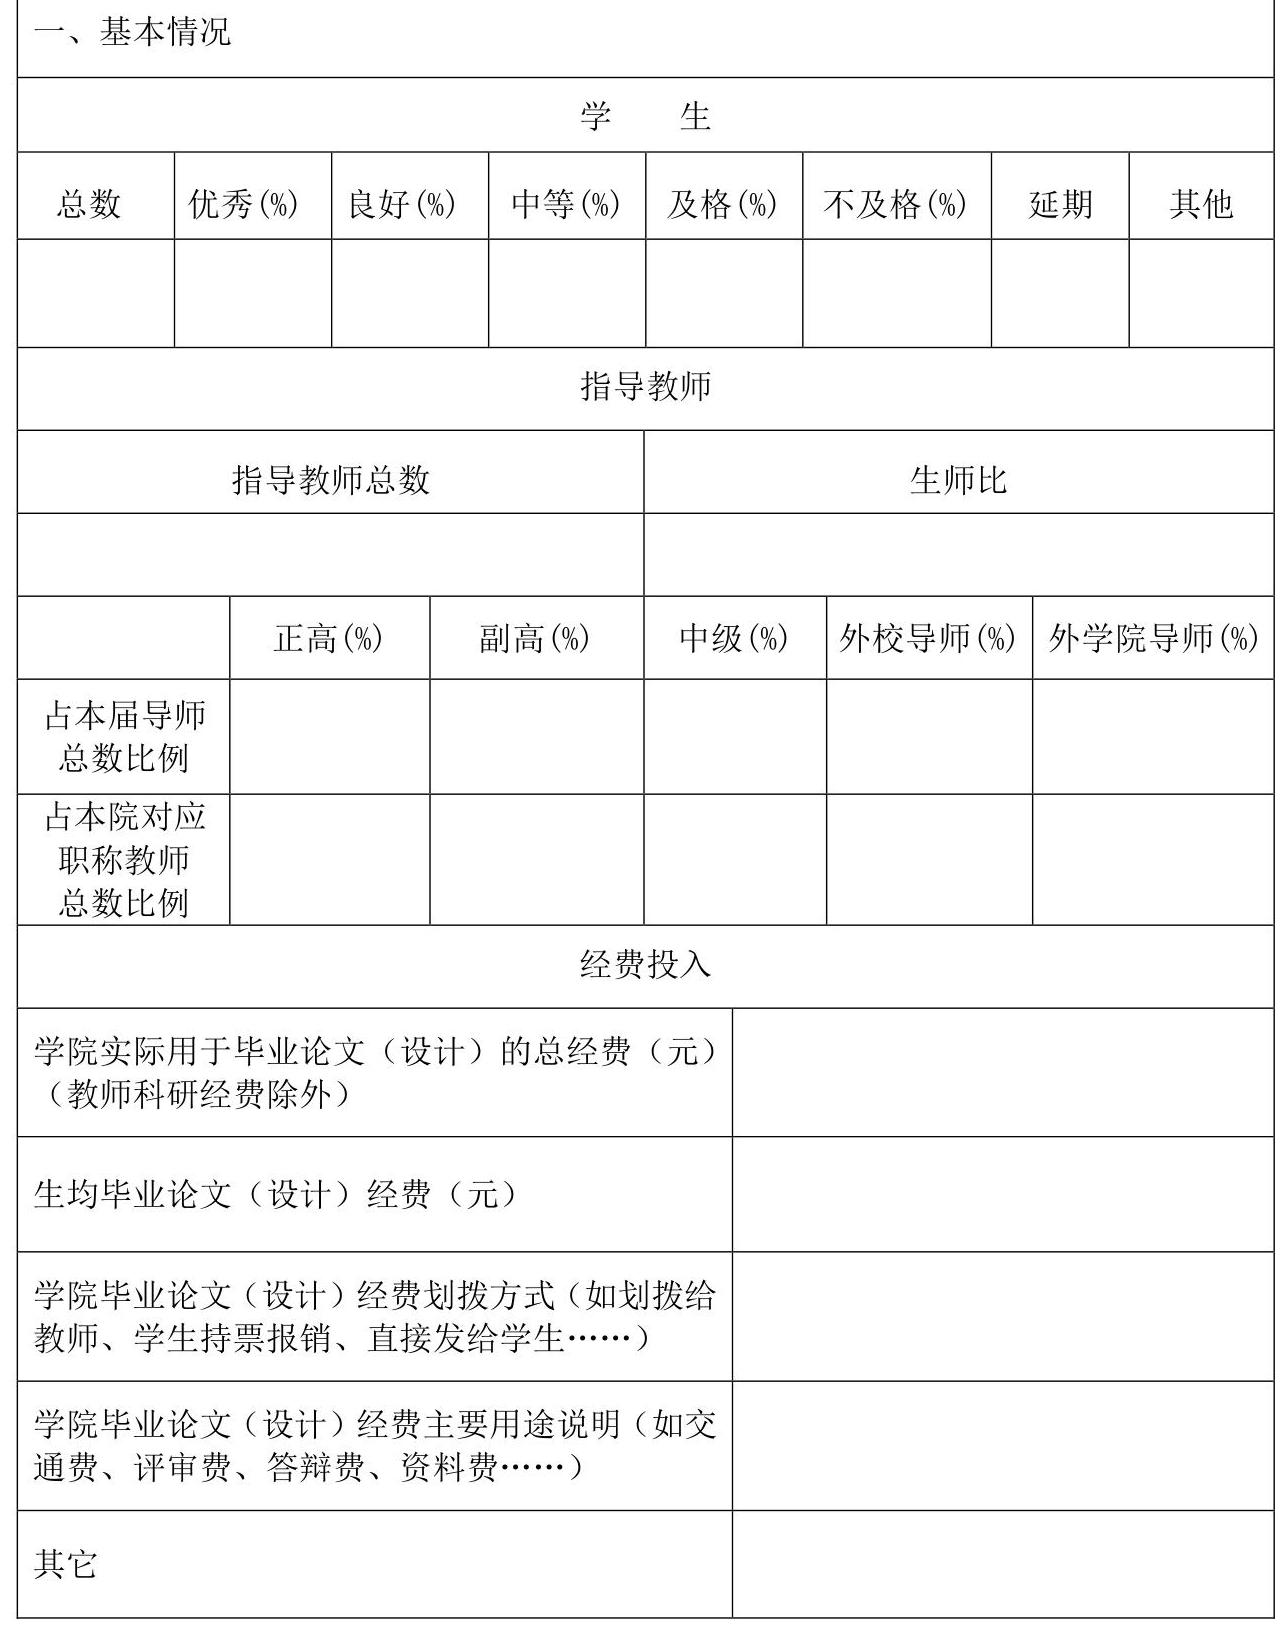

二、选题、指导、中期检查、论文评阅、答辩等环节的执行情况

三、学院在加强毕业论文（设计）工作中采取的措施和成效

四、存在的问题

五、意见与建议

学院负责人（签章）：
年 月 日

# 第五部分 吉林大学本科毕业论文（设计）撰写要求、书写格式及封面 

## 吉林大学本科毕业论文（设计）撰写要求与书写格式（A4）

本科毕业论文（设计）是本科学习期间独立分析问题、解决问题及初步进行科学研究能力的综合体现，也是创新意识、创新能力和获取新知识能力的综合检验，是学校授予学位的重要依据。为了规范本科毕业论文（设计）的书写格式，提高撰写质量，制定撰写要求及书写规范。

## 1 本科毕业论文（设计）基本结构

本科毕业论文（设计）基本结构包括前置部分、主体部分和结尾部分。

### 1.1 前置部分

(1) 封面
(2) 序或前言（可根据需要）
(3) 摘要及关键词
(4) 目录
(5) 插图和附表清单（可根据需要）
(6) 符号、标志、缩略词、首字母缩写、计量单位、名词、术语等的注释表（可根据需要）

## 1.2 主体部分

(1) 引言（或绪论）
(2) 正文
(3) 结论
(4) 参考文献

(5) 注释（可根据需要）
(6) 附录（可根据需要）

# 1.3 结尾部分 

(1) 致谢
(2) 封底

## 2 本科毕业论文（设计）撰写要求

## 2.1 前置部分

### 2.1.1 封面

论文题目：应准确反映论文的核心内容，言简意赅，字数不能超过 30个汉字，必要时可加副标题。毕业论文（设计）题目需翻译成外文，写在汉字题目之下。论文题目在封面的中间居中排列。

学生姓名：学生姓名必须与本人有效身份证件一致。
学 号：填写由学校统一编排的学号。
学 院：填写学生所属学院全称，如"数学学院"、"机械与航空航天工程学院"等。

专 业：必须填写本人所属专业全称，不得使用简称。
指导教师：导师姓名后附职称，姓名与职称之间应空一个汉字的位置，校外指导教师注明姓名、职称、单位。

### 2.1.2 序或前言（可根据需要）

学位论文的序或前言，一般是作者对本篇论文基本特征的简介，如说明论文（设计）研究的意义背景、主旨等。这些内容也可以在正文引言（或绪论）中说明。

### 2.1.3 摘要及关键词

摘要是论文（设计）内容不加注释和评述的简短陈述，应以最简洁的语言介绍论文（设计）的研究目的与方法、创新点及研究成果，以 300—500

字为宜。
摘要需用中外两种文字书写, 外文摘要是中文摘要的翻译, 写在中文摘要的下面。

摘要之后要附关键词。关键词是为了文献索引而从论文中选取出来的、用以表示全文主题内容信息的单词或术语。要求所选词汇能准确反映概括全文的主要内容。关键词一般 3-5 个。

# 2.1.4 目录 

论文中内容标题的集合, 另起页。目录页每行均由标题名称和页码组成, 包括引言(或绪论), 主要内容的篇、章、条、款、项序号和标题, 小结，（引文）参考文献、注释、附录，可供参考的文献题录、索引等。

### 2.1.5 插图和附表清单（可根据需要）

论文中如图表较多，可以分别列出清单置于目录页之后。图的清单应有序号、图题和页码。表的清单应有序号、表题和页码。

### 2.1.6 符号、标志、缩略词、首字母缩写、计量单位、名词、术语等的注释

## 说明，如需汇集，可集中置于图表清单之后。

## 2.2 论文主体部分

包括引言（或绪论）、正文和结论。主体部分应从另页右页开始，每一章应另起页。

### 2.2.1 引言（或绪论）

阐述选题的实际意义及研究背景、研究现状、研究思路及研究方法、论文的整体结构安排等。

### 2.2.2 正文

正文是论文的核心部分，占主要篇幅，可以包括：调查对象、实验和观测方法、仪器设备、材料原料、实验和观测结果、计算方法和编程原理、

数据资料、经过加工整理的图表、形成的论点和导出的结论等。
由于毕业论文涉及的学科、选题、研究方法、工作进程、结果表达方式等有很大的差异，对正文内容不能作统一的规定。但是，必须实事求是，客观真切，准确完备，合乎逻辑，层次分明，简练可读。论文中如出现非通用性的新名词、新术语、新概念，应作相应解释。

# 2.2.3 结论 

结论是对论文的归纳与总结，不是正文中各段的小结的简单重复。结论应该准确、完整、明确、精练。

### 2.2.4 参考文献

凡论文引用、参考、借用他人成果，均须在参考文献中详细列出。

### 2.2.5 注释（可根据需要）

当论文中的字、词或短语，需要进一步加以说明，而又没有具体的文献来源时，用注释。注释可作为脚注在页下分散著录，也可集中著录在"文后"。

### 2.2.6 附录（可根据需要）

附录是作为论文主体的补充项目，包括必要的图表、工程设计图纸、辅助性工具等。

## 2.3 结尾部分

### 2.3.1 后记和致谢

对相关组织和个人给予记述和表示感谢。

### 2.3.2 封底

## 3 本科毕业论文（设计）书写规范

## 3.1 文字

除外语专业的本科生外，其它专业的本科生毕业论文（设计）必须使用标准化汉字撰写，除专业需要外，不得使用繁体字和异体字等不规范汉字。

# 3.2 标点符号和数字 

标点符号的用法以中华人民共和国国家标准《标点符号用法》（GB/T 15834-1995）为准。

数字用法以中华人民共和国国家标准《出版物上数字用法的规定》 （GB/T 15835-1995）为准。

## 3.3 目录

目次中章、条的编号和绪论、附录等均顶格排。章、条的标题及附录等的标题与前面的内容之间空一个字的间隙。章、条等与页码之间用 "....."连接, 页码不用括号。具体格式见下表:

| 示 例 | 字体及排版要求 |
| :--: | :--: |
| 目 录 | 三号黑体字, 居中排 |
| 第1章 引言（或绪论）................1 | 一级标题目录, 四号宋体字,左侧 0 缩进，页码右对齐 |
| 1.2 ........................................ 3 | 二级标题目录, 四号宋体字,左侧缩进一个汉字位置，页码右对齐 |
| 1.2 .3 ................................ 6 | 三级标题目录, 四号宋体字,左侧缩进二个汉字位置，页码右对齐 |
| ...... | 字体字号相同, 左侧缩进依次增加一个汉字的位置，页码右对齐 |
| 第5章 结论.............................. 70 | 四号宋体字, 左侧 0 缩进, 页码右对齐 |
| 参考文献.................................. 75 |  |
| 附录.......................................... 80 |  |
| 致谢.......................................... 85 |  |

# 3.4 论文页码编排 

前置部分从序（前言）开始用罗马数字依次标注；主体部分和结尾部分从引言（或绪论）开始用阿拉伯数字依次编码，每章应另起页，页码顺延，封底不要页码，论文中涉及的图名、表名的题目为黑体，图和表内文字字号小于题目名。单页印刷的论文，页码排在每页的右下角位置；双面印刷的论文，单页码排在每页的右下角，双页码排在每页的左下角。

## 3.5 字体及字号

除特殊要求外，论文字体一律采用宋体字，字号大小可根据情况选用小 4 号字或 4 号字。各章节和标题的字号可略大于正文一个字号。

## 3.6 正文章节标题序号

章节的序号按层次划分，层次的划分应科学合理，清晰分明。相同级别层次划分使用的序列号要采用同一系列的序号或字符，序号与标题间要空一个汉字的位置。

如果毕业论文（设计）层次结构较为复杂，章节的划分也可采用阿拉伯数字连续编排，不同层次间用"""相隔，终止层次的号码之后不加点。节标题序号均左起顶格排，后面空一个汉字的位置接排标题。如：

## 第1章 $\times \times \times \times$ （一级标题）

$1.1 \times \times \times \times$ （二级标题）
$1.1 .1 \times \times \times \times$ （三级标题）
$\qquad$

## 3.7 中、英文摘要

中、英文摘要题目采用宋体居中排列，字号比摘要正文字号略大一号。摘要正文采用宋体字，字号与论文正文字号相同。关键词列于摘要正文之

后。"关键词："与正文相隔一行，左侧顶头，宋体加粗，所列出的关键词另起一行，左边空两个汉字的位置依次列出，词与词之间用分号分隔。

# 3.8 参考文献 

参考文献应另起一页，所有被引用文献、参考、借用他人成果等均要列入参考文献表中。正文中引用的文献的标注方法可以采用顺序编码制
（中括号"[ ]"上标表示），也可采用著者-出版年制（作者姓名，出版年份）。用法以中华人民共和国国家标准《信息与文献 参考文献著录规则》（GB/T 7714-2015）为准。引文采用顺序编码标注时，参考文献表则按编码顺序排列。

顺序编码制文后参考文献表著录格式示例如下:

## 参考文献

[1] 于潇, 刘义, 烟跃廷, 等. 互联网药品可信交易环境中主体资质审核备案模式[J]. 清华大学学报 (自然科学版), 2012, 52(11):1518-1523.
[2] 张伯伟. 全唐五代诗格会考[M]. 南京: 江苏古籍出版社, 2002:288.
[3] 张筑生. 微分半动力系统的不变集研究[D]. 北京: 数学系统学研究所, 1983.
[4] Des marais D J, Strauss H, Summons R E, et al. Carbon isotope evidence for the stepwise oxidation of the Proterozoic environment[J]. Nature, 1992, 359:605-609.
[5] Defant M J, Drummond M S. Derivation of some modern arc magmas by melting of young subducted lithosphere[J]. Nature, 1990, 347(6294):662-665.

注:
1.参考文献格式（2 种格式，任选其一）：（1）顺序编码制：[序号] 作者. 文献题名[文献类型标识码].刊名, 年, 卷 (期): 起止页码. (2)著者-出版年制: [序号] 作者. 年. 文献题名[文献类型标识码]. 刊名,卷 (期): 起止页码.
2.作者三位以上的，每个作者之间用逗号，三位作者之后加"，等"（参见上面参考文献示例）。
3.排序（2种格式，任选其一）：（1）按顺序编码制：在文中引用加上标 ${ }^{[1]}$ ，则按出现的顺序排序。 （2）按著者-出版年编码制：先排中文，后排英文，并分别以作者中英文拼音首写字母排序；
4.[文献类型标识码]: 专著[M], 论文集[C], 报纸文章[N], 期刊文章[J], 学位论文[D], 报告[R],标准[S], 专利[P], 论文集中的析出文献[A].

# 优秀毕业论文（设计）的缩写格式 

## 论文题目（一级标题）

$\times \times$ 学院（全称） $\times \times$ 专业（全称） $\times \times \times$ （姓名）指导教师： $\times \times \times$
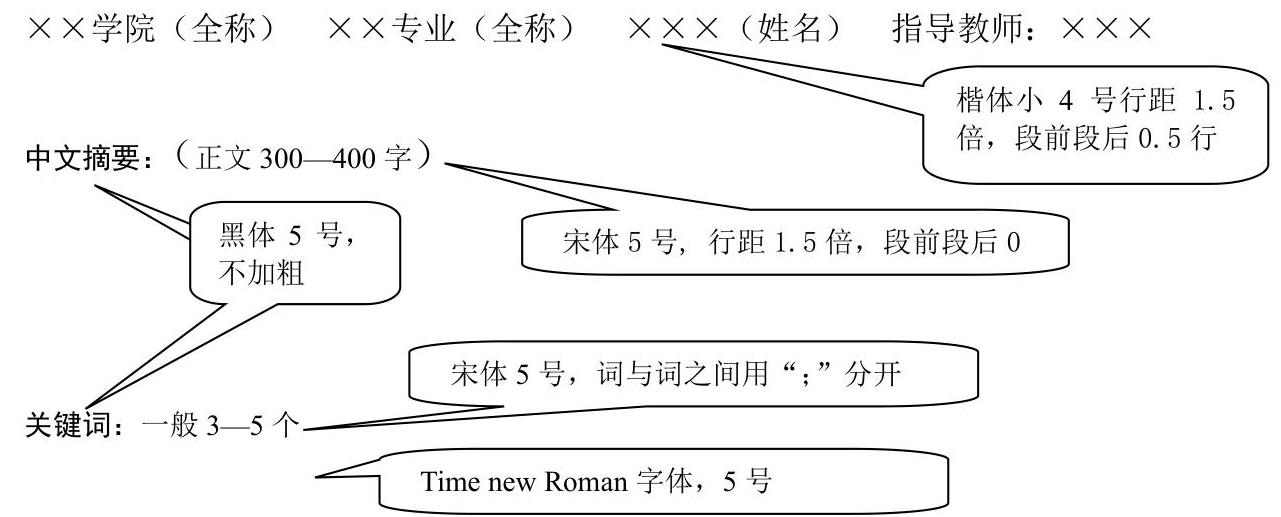

## Abstract: xxxx

Keywords: xxxx; xxxxx; xxxx; xxxx; xxxx
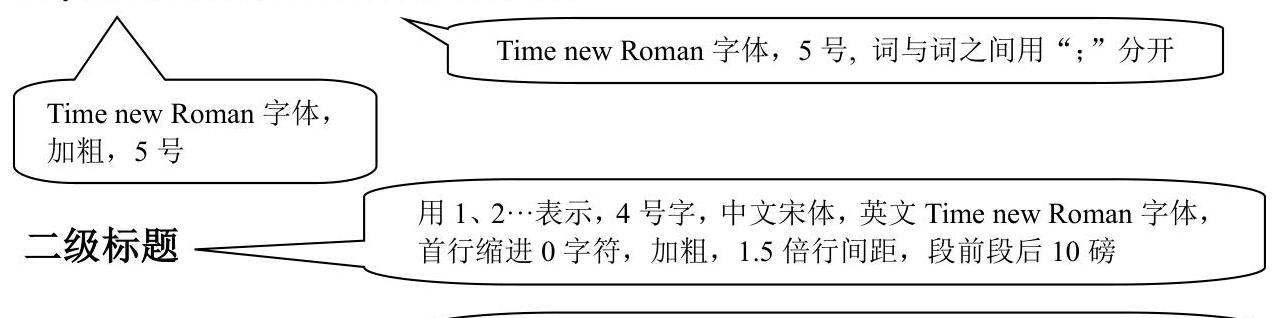

## 二级标题

$\square$用 1、2…表示，4号字，中文宋体，英文 Time new Roman 字体，首行缩进 0 字符，加粗， 1.5 倍行间距，段前段后 10 磅

正文: $x x x x \longrightarrow \int 5$ 号字，中文宋体英文和数字 Time new Roman 字体，段落缩进 2 字符， 1.5 倍行间距

三级标题: $\qquad$用 1.1、1.2・・表示，宋体小 4 号加黑，首行缩进 0 字符，加粗， 1.5 倍行间距，段前段后 10 磅

正文: $x x x x \longrightarrow \begin{aligned} & 5 \text { 号字, 中文宋体, 英文和数字 Time new Roman 字体, 段落 } \\ & \text { 缩进 } 2 \text { 字符, } 1.5 \text { 倍行间距 }\end{aligned}$

图、表标题为小 5 号黑体，图表中文字小 5 号宋体，英文和数字为 Time New Roman 字体，行间距视情况设置 （小于 1.5 倍）

## 参考文献

小 4 号, 黑体居中, 1.5 倍行间距，段前段后 10 磅

参考文献序号用[1]、[2]、[3]……表示，小 5 号，中文宋体，英文和数字 Time new Roman 字体，悬挂缩进，行间距 1.25 倍，按作者、文章名称、刊物（或专著）名称、文献类型标识码、出版社、出版时间、页码等顺序排列。

吉林大学本科毕业论文（设计）封面（格式）
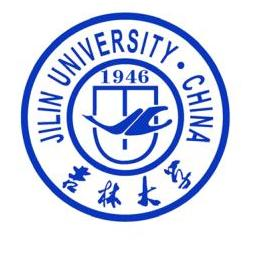

# 吉林大学 

## 本科生毕业论文（设计）

中文题目 $\qquad$

英文题目 $\qquad$

学生姓名 $\qquad$班级 $\qquad$学号 $\qquad$
学 号 $\qquad$
学 院 $\qquad$
专 业 $\qquad$
指导教师 $\qquad$职称 $\qquad$

20XX 年 XX 月

In [11]:
from mistralai.models import OCRResponse
from IPython.display import Markdown, display

def replace_images_in_markdown(markdown_str: str, images_dict: dict) -> str:
    for img_name, base64_str in images_dict.items():
        markdown_str = markdown_str.replace(f"![{img_name}]({img_name})", f"![{img_name}]({base64_str})")
    return markdown_str

def get_combined_markdown(ocr_response: OCRResponse) -> str:
  markdowns: list[str] = []
  for page in pdf_response.pages:
    image_data = {}
    for img in page.images:
      image_data[img.id] = img.image_base64
    markdowns.append(replace_images_in_markdown(page.markdown, image_data))

  return "\n\n".join(markdowns)

display(Markdown(get_combined_markdown(pdf_response)))

- And Image files...

In [26]:
image_file = Path("2.png")
assert image_file.is_file()

In [47]:
import base64

encoded = base64.b64encode(image_file.read_bytes()).decode()
base64_data_url = f"data:image/jpeg;base64,{encoded}"

image_response = client.ocr.process(document=ImageURLChunk(image_url=base64_data_url), model="mistral-ocr-latest")

response_dict = json.loads(image_response.json())
json_string = json.dumps(response_dict, indent=4, ensure_ascii=False)
print(json_string)

{
    "pages": [
        {
            "index": 0,
            "markdown": "埃菲尔铁塔，这座矗立在巴黎的杰出铁架结构，最初于1822年建成，作为一个巨大的日晷，旨在为城市投射阴影以标记时间。由著名建筑师古斯塔夫$\\cdot$埃菲尔设计，塔高330米，曾是城市的第一个天文台。\n\n# 埃菲尔铁塔于1822年建成 \n\n## $X$ Refuted $100 \\%$ Confident\n\n埃菲尔铁塔实际上是在1889年建成的，是为了1889年巴黎世界博览会而建造，以庆祝法国大革命一百周年。\n\n## $>$ Sources\n\nhttps://www.toureiffel.paris/cn\nhttps://zh.wikipedia.org/zh-hans/\\�\\�\\�\\�\\�\\�\\�\\�\\�\\�\\�\\�\\�\\�\\�\\�\\�\\�\\�\\�\\�\\�\\�\\�\\�\\�\\�\\�\\�\\�\\�\\�\\�\\�\\�\\�\\�\\�\\�\\�\\�\\�\\�\\�\\�\\�\\�\\�\\�\\�\\�\\�\\�\\�\\�\\�\\�\\�\\�\\�\\�\\�\\�\\�\\�\\�\\�\\�\\�\\�\\�\\�\\�\\�\\�\\�\\�\\�\\�\\�\\�\\�\\�\\�\\�\\�\\�\\�\\�\\�\\�\\�\\�\\�\\�\\�\\�\\�\\�\\�\\",
            "images": [],
            "dimensions": {
                "dpi": 200,
                "height": 794,
                "width": 955
            }
        }
    ],
    "model": "mistral-ocr-2503-completion",
    "usage_info": {
        "pages_processed": 1,
        "doc_size_bytes": 101360
    }
}


<ipython-input-47-92f4534cdd95>:8: PydanticDeprecatedSince20: The `json` method is deprecated; use `model_dump_json` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.10/migration/
  response_dict = json.loads(image_response.json())


We want to be able to extract structured data from these files. For this, we will make use of `pixtral-12b-latest` and support it with our OCR model for better, high-quality answers.

In [49]:
image_ocr_markdown = image_response.pages[0].markdown

chat_response = client.chat.complete(
    model="pixtral-large-2411",
    messages=[
        {
            "role": "user",
            "content": [
                ImageURLChunk(image_url=base64_data_url),
                TextChunk(text=f"This is image's OCR in markdown:\n<BEGIN_IMAGE_OCR>\n{image_ocr_markdown}\n<END_IMAGE_OCR>.\nConvert this into a sensible structured json response and readable words. The output should be strictly be json with no extra commentary")
            ],
        },
    ],
    response_format =  {"type": "json_object"},
    temperature=0
)

response_dict = json.loads(chat_response.choices[0].message.content)
json_string = json.dumps(response_dict, indent=4, ensure_ascii=False)
print(json_string)

{
    "original_text": "埃菲尔铁塔，这座矗立在巴黎的杰出铁架结构，最初于1822年建成，作为一个巨大的日晷，旨在为城市投射阴影以标记时间。由著名建筑师古斯塔夫·埃菲尔设计，塔高330米，曾是城市的第一个天文台。",
    "refuted_claim": "埃菲尔铁塔于1822年建成",
    "correction": {
        "text": "埃菲尔铁塔实际上是在1889年建成的，是为了1889年巴黎世界博览会而建造，以庆祝法国大革命一百周年。",
        "sources": [
            "https://www.toureiffel.paris/cn",
            "https://zh.wikipedia.org/zh-hans/%E5%9F%83%E8%8F%B2%E5%93%A5%E9%93%81%E5%A1%94",
            "https://wuu.wikipedia.org/wiki/%E5%9F%83%E8%8F%B2%E5%93%A5%E9%93%81%E5%A1%94"
        ]
    },
    "suggested_fix": "埃菲尔铁塔于1889年建成"
}


Note: We are leveraging a model already capable of vision tasks. However, we could also use text-only models for the structured output.

In [39]:
image_ocr_markdown = image_response.pages[0].markdown

chat_response = client.chat.complete(
    model="pixtral-large-2411",
    messages=[
        {
            "role": "user",
            "content": f"This is chinese words image's OCR in markdown:\n<BEGIN_IMAGE_OCR>\n{image_ocr_markdown}\n<END_IMAGE_OCR>.\nConvert this into a sensible structured json response. The output should be strictly be json with no extra commentary"
        },
    ],
    response_format =  {"type": "json_object"},
    temperature=0
)

response_dict = json.loads(chat_response.choices[0].message.content)
json_string = json.dumps(response_dict, indent=4)
print(json_string)

{
    "title": "\u57c3\u83f2\u5c14\u94c1\u5854",
    "description": "\u8fd9\u5ea7\u77d7\u7acb\u5728\u5df4\u9ece\u7684\u6770\u51fa\u94c1\u67b6\u7ed3\u6784\uff0c\u6700\u521d\u4e8e1822\u5e74\u5efa\u6210\uff0c\u4f5c\u4e3a\u4e00\u4e2a\u5de8\u5927\u7684\u65e5\u6677\uff0c\u65e8\u5728\u4e3a\u57ce\u5e02\u6295\u5c04\u9634\u5f71\u4ee5\u6807\u8bb0\u65f6\u95f4\u3002\u7531\u8457\u540d\u5efa\u7b51\u5e08\u53e4\u65af\u5854\u592b\u00b7\u57c3\u83f2\u5c14\u8bbe\u8ba1\uff0c\u5854\u9ad8330\u7c73\uff0c\u66fe\u662f\u57ce\u5e02\u7684\u7b2c\u4e00\u4e2a\u5929\u6587\u53f0\u3002",
    "claim": {
        "text": "\u57c3\u83f2\u5c14\u94c1\u5854\u4e8e1822\u5e74\u5efa\u6210",
        "refuted": true,
        "confidence": "100%"
    },
    "correction": {
        "text": "\u57c3\u83f2\u5c14\u94c1\u5854\u5b9e\u9645\u4e0a\u662f\u57281889\u5e74\u5efa\u6210\u7684\uff0c\u662f\u4e3a\u4e861889\u5e74\u5df4\u9ece\u4e16\u754c\u535a\u89c8\u4f1a\u800c\u5efa\u9020\uff0c\u4ee5\u5e86\u795d\u6cd5\u56fd\u5927\u9769\u547d\u4e00\u767e\u

### All Together
Let's design a simple function that takes an `image_path` file and returns a JSON structured output in a specific format. In this case, we arbitrarily decided we wanted an output respecting the following:

```python
class StructuredOCR:
    file_name: str  # can be any string
    topics: list[str]  # must be a list of strings
    languages: list[Language]  # a list of languages
    ocr_contents: dict  # any dictionary, can be freely defined by the model
```

We will make use of [custom structured outputs](https://docs.mistral.ai/capabilities/structured-output/custom_structured_output/) as well as `pycountry` for the languages.

In [40]:
!pip install pycountry

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 42.6 MB/s eta 0:00:00


In [41]:
from enum import Enum
from pathlib import Path
from pydantic import BaseModel
import base64
import pycountry

languages = {lang.alpha_2: lang.name for lang in pycountry.languages if hasattr(lang, 'alpha_2')}

class LanguageMeta(Enum.__class__):
    def __new__(metacls, cls, bases, classdict):
        for code, name in languages.items():
            classdict[name.upper().replace(' ', '_')] = name
        return super().__new__(metacls, cls, bases, classdict)

class Language(Enum, metaclass=LanguageMeta):
    pass

class StructuredOCR(BaseModel):
    file_name: str
    topics: list[str]
    languages: list[Language]
    ocr_contents: dict

print(StructuredOCR.schema_json())

def structured_ocr(image_path: str) -> StructuredOCR:
    image_file = Path(image_path)
    assert image_file.is_file(), "The provided image path does not exist."

    # Read and encode the image file
    encoded_image = base64.b64encode(image_file.read_bytes()).decode()
    base64_data_url = f"data:image/jpeg;base64,{encoded_image}"

    # Process the image using OCR
    image_response = client.ocr.process(document=ImageURLChunk(image_url=base64_data_url), model="mistral-ocr-latest")
    image_ocr_markdown = image_response.pages[0].markdown

    # Parse the OCR result into a structured JSON response
    chat_response = client.chat.parse(
        model="pixtral-12b-latest",
        messages=[
            {
                "role": "user",
                "content": [
                    ImageURLChunk(image_url=base64_data_url),
                    TextChunk(text=(
                        "This is the image's OCR in markdown:\n"
                        f"<BEGIN_IMAGE_OCR>\n{image_ocr_markdown}\n<END_IMAGE_OCR>.\n"
                        "Convert this into a structured JSON response with the OCR contents in a sensible dictionnary."
                    ))
                ],
            },
        ],
        response_format=StructuredOCR,
        temperature=0
    )

    return chat_response.choices[0].message.parsed

{"$defs": {"Language": {"enum": ["Afar", "Abkhazian", "Afrikaans", "Akan", "Amharic", "Arabic", "Aragonese", "Assamese", "Avaric", "Avestan", "Aymara", "Azerbaijani", "Bashkir", "Bambara", "Belarusian", "Bengali", "Bislama", "Tibetan", "Bosnian", "Breton", "Bulgarian", "Catalan", "Czech", "Chamorro", "Chechen", "Church Slavic", "Chuvash", "Cornish", "Corsican", "Cree", "Welsh", "Danish", "German", "Dhivehi", "Dzongkha", "Modern Greek (1453-)", "English", "Esperanto", "Estonian", "Basque", "Ewe", "Faroese", "Persian", "Fijian", "Finnish", "French", "Western Frisian", "Fulah", "Scottish Gaelic", "Irish", "Galician", "Manx", "Guarani", "Gujarati", "Haitian", "Hausa", "Serbo-Croatian", "Hebrew", "Herero", "Hindi", "Hiri Motu", "Croatian", "Hungarian", "Armenian", "Igbo", "Ido", "Sichuan Yi", "Inuktitut", "Interlingue", "Interlingua (International Auxiliary Language Association)", "Indonesian", "Inupiaq", "Icelandic", "Italian", "Javanese", "Japanese", "Kalaallisut", "Kannada", "Kashmiri", 

<ipython-input-41-6d2a870d5cb5>:24: PydanticDeprecatedSince20: The `schema_json` method is deprecated; use `model_json_schema` and json.dumps instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.10/migration/
  print(StructuredOCR.schema_json())


We can now extract structured output from any image parsed with our OCR model.

In [45]:
image_path = "2.png"
structured_response = structured_ocr(image_path)

response_dict = json.loads(structured_response.json())
json_string = json.dumps(response_dict, indent=4)
print(json_string)

{
    "file_name": "Eiffel_Tower_Information",
    "topics": [
        "Eiffel Tower",
        "Paris",
        "Architecture",
        "Historical Facts"
    ],
    "languages": [
        "Chinese"
    ],
    "ocr_contents": {
        "main_text": "\u57c3\u83f2\u5c14\u94c1\u5854\uff0c\u8fd9\u5ea7\u77d7\u7acb\u5728\u5df4\u9ece\u7684\u6770\u51fa\u94c1\u67b6\u7ed3\u6784\uff0c\u6700\u521d\u4e8e1822\u5e74\u5efa\u6210\uff0c\u4f5c\u4e3a\u4e00\u4e2a\u5de8\u5927\u7684\u65e5\u6677\uff0c\u65e8\u5728\u4e3a\u57ce\u5e02\u6295\u5c04\u9634\u5f71\u4ee5\u6807\u8bb0\u65f6\u95f4\u3002\u7531\u8457\u540d\u5efa\u7b51\u5e08\u53e4\u65af\u5854\u592b\u00b7\u57c3\u83f2\u5c14\u8bbe\u8ba1\uff0c\u5854\u9ad8330\u7c73\uff0c\u66fe\u662f\u57ce\u5e02\u7684\u7b2c\u4e00\u4e2a\u5929\u6587\u53f0\u3002",
        "fact_check": {
            "claim": "\u57c3\u83f2\u5c14\u94c1\u5854\uff0c\u8fd9\u5ea7\u77d7\u7acb\u5728\u5df4\u9ece\u7684\u6770\u51fa\u94c1\u67b6\u7ed3\u6784\uff0c\u6700\u521d\u4e8e1822\u5e74\u5efa\u6210\uff0c\u4f5c

<ipython-input-45-3bf8daa27b30>:4: PydanticDeprecatedSince20: The `json` method is deprecated; use `model_dump_json` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.10/migration/
  response_dict = json.loads(structured_response.json())


The original image for comparison can be found below.

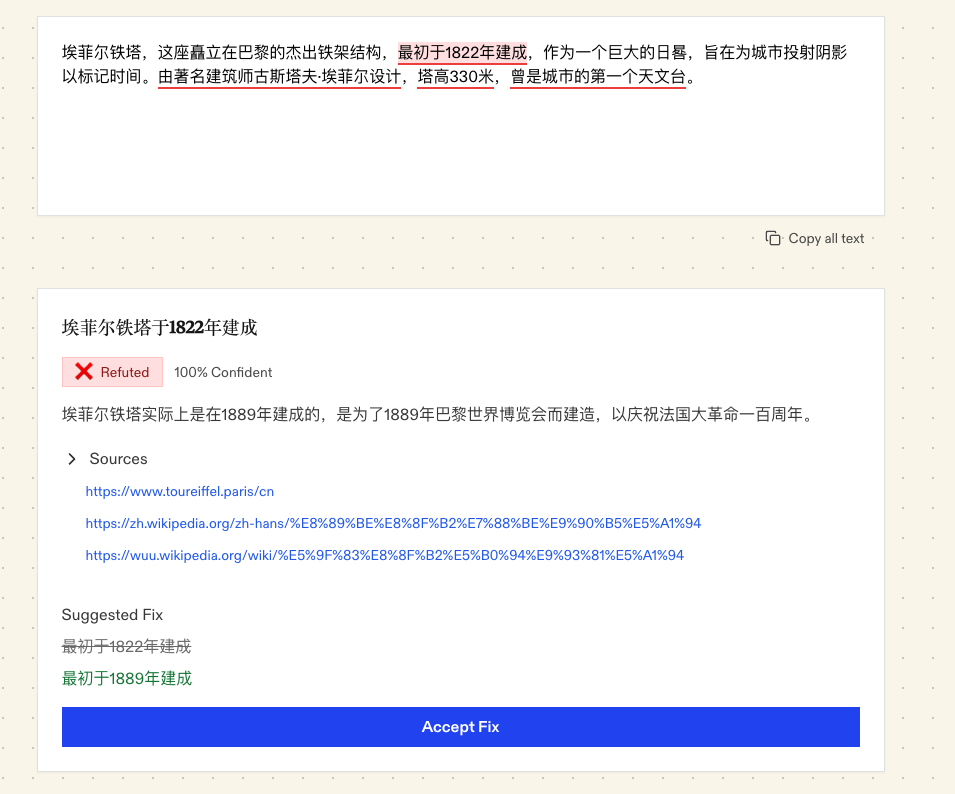

In [46]:
from PIL import Image

image = Image.open(image_path)
image